# Road behavior pattern detection model 
in Querétaro city streets by the use of shape descriptors


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from scipy import stats
from scipy.cluster import hierarchy

#matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

# Change the Background Color of Seaborn Plots
sb.set_style("white")

# Import dataset (file, *.csv) 
We assume that the file is located in the same directory as the notebook

In [2]:
dataset =  "./HDV_0056_cama_"
dataframe_a = pd.read_csv(dataset+"features.csv")
dataframe_a.head()

,TARGET,AREA,PERIMETER,X,Y,STDX,STDY,CIR,EULER,HARRIS,MHU1,MHU2,MHU3,MHU4
0,3,9,7.476,20.00,71.00,0.86603,0.86603,1.00,1,0,0.14815,0.000000,0.000000,0.005487
1,3,12,9.436,19.50,71.00,1.16770,0.85280,1.00,1,0,0.18056,0.004823,0.000579,0.010747
2,3,9,7.476,19.00,71.00,0.86603,0.86603,1.00,1,0,0.14815,0.000000,0.000000,0.005487
3,3,14,10.106,19.50,71.50,1.09190,1.09190,1.00,1,1,0.19388,0.006664,0.001075,0.019996
4,3,25,16.540,20.76,71.68,2.00580,1.06930,0.84,1,2,0.24000,0.018688,0.008622,0.024224


In [3]:
dataset =  "./HDV_0056_camb_"
dataframe_b = pd.read_csv(dataset+"features.csv")
dataframe_b.head()

,TARGET,AREA,PERIMETER,X,Y,STDX,STDY,CIR,EULER,HARRIS,MHU1,MHU2,MHU3,MHU4
0,29,3,3.920,129.00,15.0,0.0,1.0000,0.0,1,0,0.22222,0.049383,0.00000,0.049383
1,29,3,3.920,129.00,15.0,0.0,1.0000,0.0,1,0,0.22222,0.049383,0.00000,0.049383
2,29,3,3.920,129.00,15.0,0.0,1.0000,0.0,1,0,0.22222,0.049383,0.00000,0.049383
3,29,9,10.842,128.67,14.0,0.5,1.7321,0.0,1,0,0.37037,0.054870,0.04542,0.110500
4,29,9,10.842,128.67,14.0,0.5,1.7321,0.0,1,0,0.37037,0.054870,0.04542,0.110500


# Plot time series of camera C2

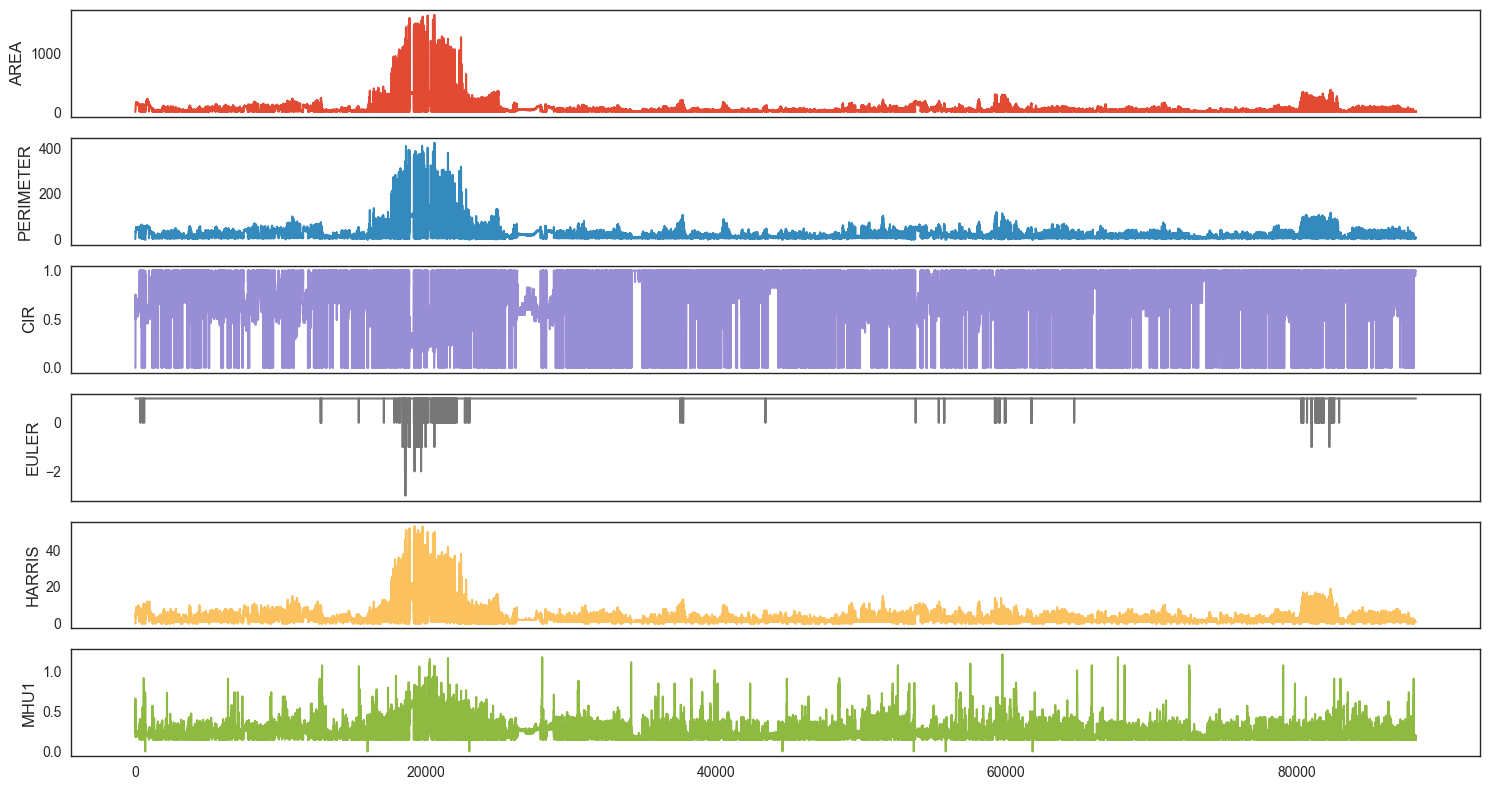

In [4]:
fig,ax = plt.subplots(6, figsize=(15,8), sharex=True)
plot_cols = ['AREA', 'PERIMETER', 'CIR', 'EULER', 'HARRIS', 'MHU1']
dataframe_b[plot_cols].plot(subplots=True, legend=False, ax=ax)
for a in range(len(ax)): 
    ax[a].set_ylabel(plot_cols[a])
ax[-1].set_xlabel('')
plt.tight_layout()
plt.show()

In [5]:
dataset =  "./HDV_0056_camc_"
dataframe_c = pd.read_csv(dataset+"features.csv")
dataframe_c.head()

,TARGET,AREA,PERIMETER,X,Y,STDX,STDY,CIR,EULER,HARRIS,MHU1,MHU2,MHU3,MHU4
0,3,15,11.975,128.20,10.600,0.77460,1.6388,1.0,1,1,0.23111,0.022835,0.004670,0.044121
1,3,13,10.106,128.15,11.000,0.80064,1.3540,1.0,1,1,0.17751,0.006862,0.001304,0.017812
2,3,13,10.660,128.15,11.231,0.80064,1.4233,1.0,1,1,0.19527,0.011379,0.000455,0.023253
3,3,13,10.660,128.15,11.231,0.80064,1.4233,1.0,1,1,0.19527,0.011379,0.000455,0.023253
4,3,14,10.751,128.07,10.143,0.82874,1.4064,1.0,1,1,0.17857,0.007939,0.000232,0.018146


# Plot time series of camera C3

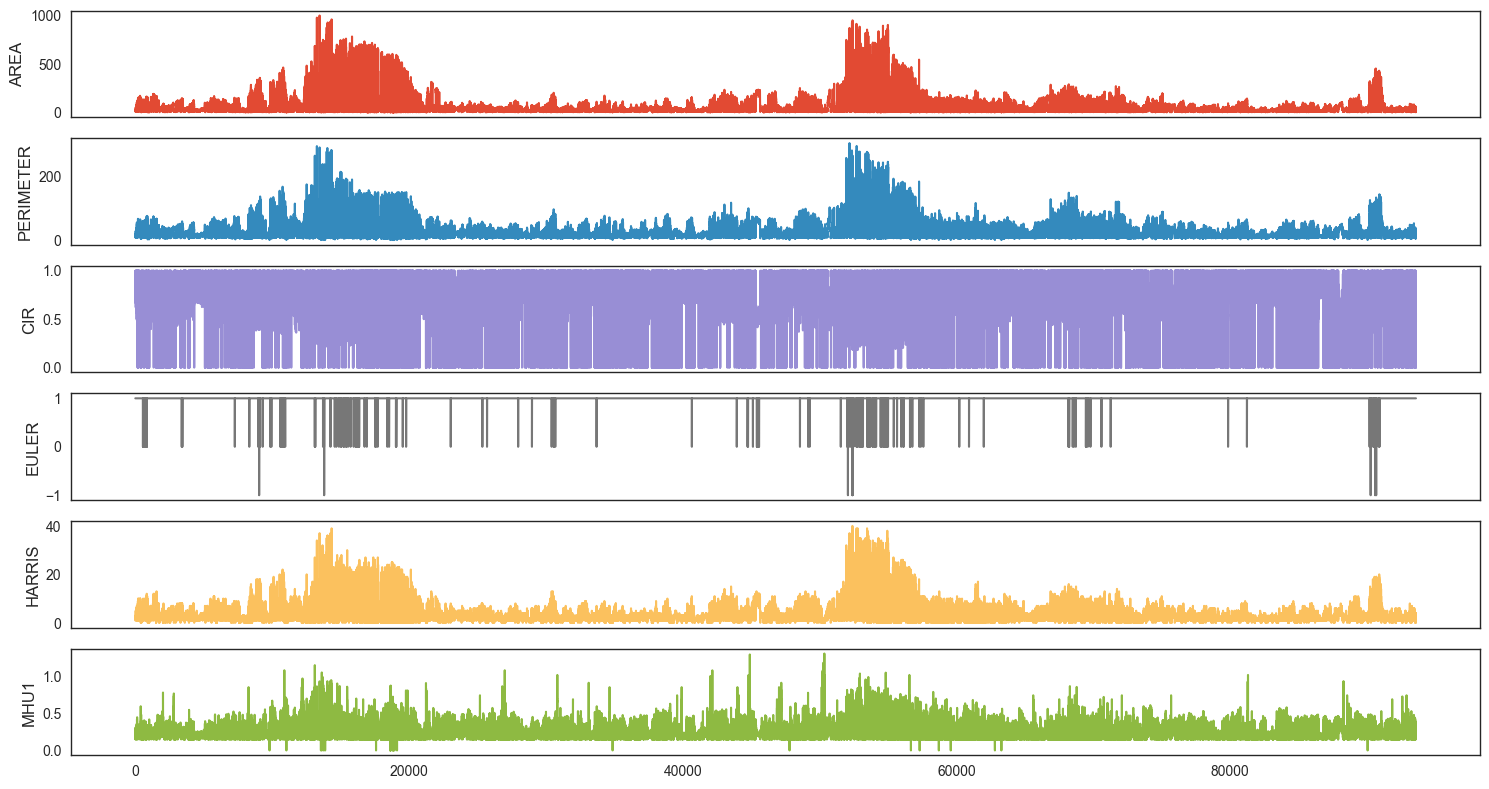

In [6]:
fig,ax = plt.subplots(6, figsize=(15,8), sharex=True)
plot_cols = ['AREA', 'PERIMETER', 'CIR', 'EULER', 'HARRIS', 'MHU1']
dataframe_c[plot_cols].plot(subplots=True, legend=False, ax=ax)
for a in range(len(ax)): 
    ax[a].set_ylabel(plot_cols[a])
ax[-1].set_xlabel('')
plt.tight_layout()
plt.show()

# Correlation coeff of C1, C2 & C3

In [7]:

# Calculate correlation between each pair of variable
corr_matrix = dataframe_a.drop(['TARGET', 'X', 'Y'], axis=1).corr(method='pearson')
dnc1 = corr_matrix
# Calculate correlation between each pair of variable
corr_matrix = dataframe_b.drop(['TARGET', 'X', 'Y'], axis=1).corr(method='pearson')
dnc2 = corr_matrix
# Calculate correlation between each pair of variable
corr_matrix = dataframe_c.drop(['TARGET', 'X', 'Y'], axis=1).corr(method='pearson')
dnc3 = corr_matrix

/var/folders/m2/fwpdyffx07vfrssrjrwss6jc0000gn/T/ipykernel_9293/705165060.py:2: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax1.get_shared_y_axes().join(ax2,ax3)
/var/folders/m2/fwpdyffx07vfrssrjrwss6jc0000gn/T/ipykernel_9293/705165060.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  g1 = sb.heatmap(dnc1, mask=mask, annot = True, vmin=-1, vmax=1, center=0, cmap=plt.cm.get_cmap('coolwarm').reversed(), square=True, linewidth=.5, fmt=".2f", cbar=False, ax=ax3, annot_kws={"fontsize":5})
/var/folders/m2/fwpdyffx07vfrssrjrwss6jc0000gn/T/ipykernel_9293/705165060.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or `

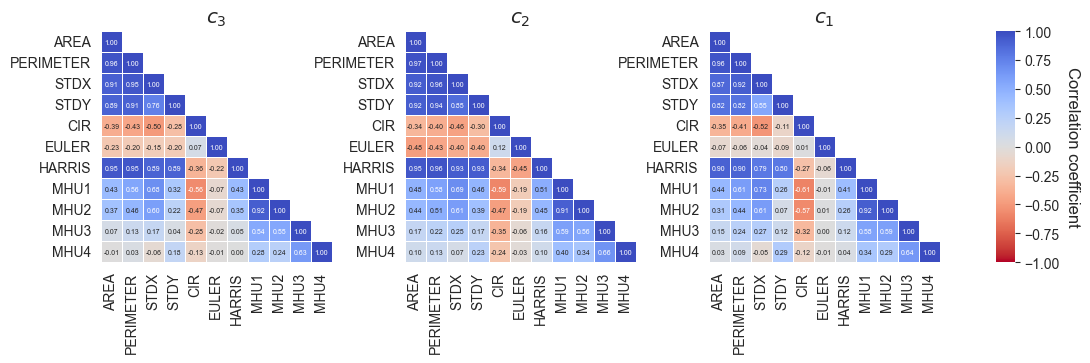

In [8]:
fig,(ax1,ax2,ax3, axcb) = plt.subplots(nrows=1, ncols=4, gridspec_kw={'width_ratios':[1,1,1,0.07]}, figsize=(12,3))
ax1.get_shared_y_axes().join(ax2,ax3)


# Getting the Upper | Lower Triangle of the co-relation matrix
mask = np.triu(corr_matrix)  # mask = np.tril(corr_matrix)
# Show diagonal values
np.fill_diagonal(mask, False)
g1 = sb.heatmap(dnc1, mask=mask, annot = True, vmin=-1, vmax=1, center=0, cmap=plt.cm.get_cmap('coolwarm').reversed(), square=True, linewidth=.5, fmt=".2f", cbar=False, ax=ax3, annot_kws={"fontsize":5})
g1.set_title(r'$c_1$')
g1.set_ylabel('')
g1.set_xlabel('')
#g1.set_yticks([])

mask = np.triu(corr_matrix)
# Show diagonal values
np.fill_diagonal(mask, False)
g2 = sb.heatmap(dnc2, mask=mask, annot = True, vmin=-1, vmax=1, center=0, cmap=plt.cm.get_cmap('coolwarm').reversed(), square=True, linewidth=.5, fmt=".2f",cbar=False, ax=ax2, annot_kws={"fontsize":5})
g2.set_title(r'$c_2$')
g2.set_ylabel('')
g2.set_xlabel('')
#g2.set_yticks([])

mask = np.triu(corr_matrix)
# Show diagonal values
np.fill_diagonal(mask, False)
g3 = sb.heatmap(dnc3, mask=mask, annot = True, vmin=-1, vmax=1, center=0, cmap=plt.cm.get_cmap('coolwarm').reversed(), square=True, linewidth=.5, fmt=".2f",ax=ax1, annot_kws={"fontsize":5}, cbar_ax=axcb)
g3.set_title(r'$c_3$')
g3.set_ylabel('')
g3.set_xlabel('')
#g3.set_yticks([])
axcb.set_ylabel('Correlation coefficient', rotation=-90, va="bottom")

plt.show()


# Dendrogram

/var/folders/m2/fwpdyffx07vfrssrjrwss6jc0000gn/T/ipykernel_9293/2949501462.py:2: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax1.get_shared_y_axes().join(ax2,ax3)


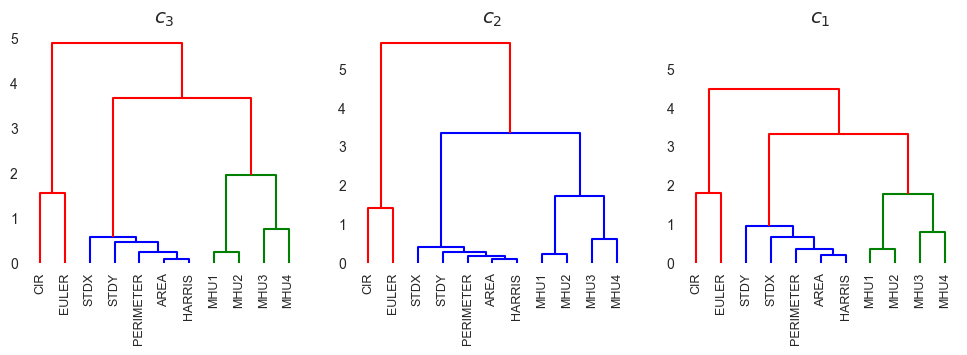

In [9]:
fig,(ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, gridspec_kw={'width_ratios':[1,1,1]}, figsize=(12,3))
ax1.get_shared_y_axes().join(ax2,ax3)

# sb.pairplot(corr_matrix, corner = True, kind = "reg")
subject = ['AREA', 'PERIMETER', 'STDX', 'STDY', 'CIR', 'EULER', 'HARRIS', 'MHU1', 'MHU2', 'MHU3', 'MHU4']


# Calculate the distance between each sample
clusters = hierarchy.linkage(dnc1, method='ward', metric='euclidean')

# Set the colour of the cluster here:
hierarchy.set_link_color_palette(['red', 'blue', 'green', 'darkorange', 'gold', 'lightcoral', 'orangered', 'brown'])

# Make the dendrogram and give the colour above threshold
dn = hierarchy.dendrogram(clusters, labels=subject, above_threshold_color='r', orientation='top', ax=ax3, leaf_rotation=90., leaf_font_size=9.)

# Add horizontal line.
#plt.axhline(y=1.45, c='grey', lw=1, linestyle='dashed')

no_spine = {'left': True, 'bottom': True, 'right': True, 'top': True}
sb.despine(**no_spine);



# Calculate the distance between each sample
clusters = hierarchy.linkage(dnc2, method='ward', metric='euclidean')

# Set the colour of the cluster here:
hierarchy.set_link_color_palette(['red', 'blue', 'green', 'darkorange', 'gold', 'lightcoral', 'orangered', 'brown'])

# Make the dendrogram and give the colour above threshold
dn = hierarchy.dendrogram(clusters, labels=subject, above_threshold_color='r', orientation='top', ax=ax2, leaf_rotation=90., leaf_font_size=9.)

# Add horizontal line.
#plt.axhline(y=1.45, c='grey', lw=1, linestyle='dashed')

no_spine = {'left': True, 'bottom': True, 'right': True, 'top': True}
sb.despine(**no_spine);



# Calculate the distance between each sample
clusters = hierarchy.linkage(dnc3, method='ward', metric='euclidean')

# Set the colour of the cluster here:
hierarchy.set_link_color_palette(['red', 'blue', 'green', 'darkorange', 'gold', 'lightcoral', 'orangered', 'brown'])

# Make the dendrogram and give the colour above threshold
dn3 = hierarchy.dendrogram(clusters, labels=subject, above_threshold_color='r', orientation='top', ax=ax1, leaf_rotation=90., leaf_font_size=9.)
        
# Add horizontal line.
#plt.axhline(y=1.45, c='grey', lw=1, linestyle='dashed')

no_spine = {'left': True, 'bottom': True, 'right': True, 'top': True}
sb.despine(**no_spine);

ax1.title.set_text(r'$c_3$')
ax2.title.set_text(r'$c_2$')
ax3.title.set_text(r'$c_1$')

# Show the graph
plt.show()

# High correlation scenario

/var/folders/m2/fwpdyffx07vfrssrjrwss6jc0000gn/T/ipykernel_9293/2896837890.py:2: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax1.get_shared_y_axes().join(ax2,ax3)
/var/folders/m2/fwpdyffx07vfrssrjrwss6jc0000gn/T/ipykernel_9293/2896837890.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  g1 = sb.heatmap(dnc1, mask=mask, annot = True, vmin=-1, vmax=1, center=0, cmap=plt.cm.get_cmap('coolwarm').reversed(), square=True, linewidth=.5, fmt=".2f", cbar=False, ax=ax3, annot_kws={"fontsize":5})
/var/folders/m2/fwpdyffx07vfrssrjrwss6jc0000gn/T/ipykernel_9293/2896837890.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` o

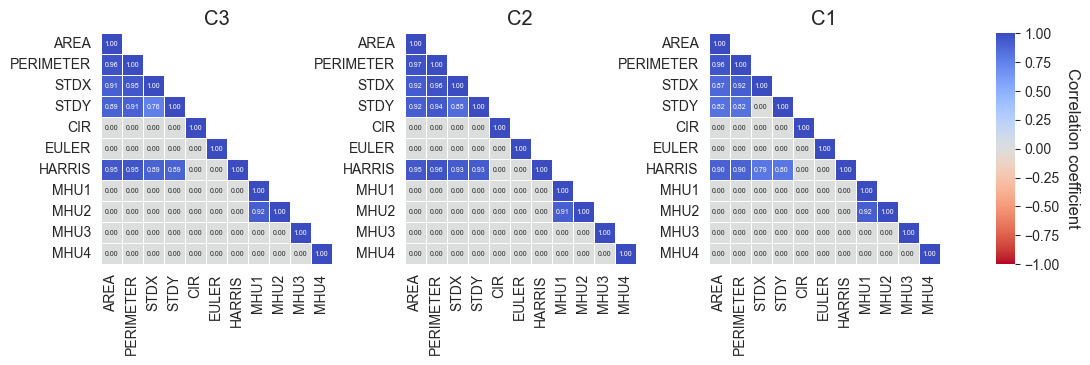

In [10]:
fig,(ax1,ax2,ax3, axcb) = plt.subplots(nrows=1, ncols=4, gridspec_kw={'width_ratios':[1,1,1,0.07]}, figsize=(12,3))
ax1.get_shared_y_axes().join(ax2,ax3)

dnc1[np.abs(dnc1)<.75] = 0.0001
# Getting the Upper | Lower Triangle of the co-relation matrix
mask = np.triu(dnc1)  # mask = np.tril(corr_matrix)
# Show diagonal values
np.fill_diagonal(mask, False)
g1 = sb.heatmap(dnc1, mask=mask, annot = True, vmin=-1, vmax=1, center=0, cmap=plt.cm.get_cmap('coolwarm').reversed(), square=True, linewidth=.5, fmt=".2f", cbar=False, ax=ax3, annot_kws={"fontsize":5})
g1.set_title('C1')
g1.set_ylabel('')
g1.set_xlabel('')
#g1.set_yticks([])

dnc2[np.abs(dnc2)<.75] = 0.0001
mask = np.triu(dnc2)
# Show diagonal values
np.fill_diagonal(mask, False)
g2 = sb.heatmap(dnc2, mask=mask, annot = True, vmin=-1, vmax=1, center=0, cmap=plt.cm.get_cmap('coolwarm').reversed(), square=True, linewidth=.5, fmt=".2f",cbar=False, ax=ax2, annot_kws={"fontsize":5})
g2.set_title('C2')
g2.set_ylabel('')
g2.set_xlabel('')
#g2.set_yticks([])

dnc3[np.abs(dnc3)<.75] = 0.0001
mask = np.triu(dnc3)
# Show diagonal values
np.fill_diagonal(mask, False)
g3 = sb.heatmap(dnc3, mask=mask, annot = True, vmin=-1, vmax=1, center=0, cmap=plt.cm.get_cmap('coolwarm').reversed(), square=True, linewidth=.5, fmt=".2f",ax=ax1, annot_kws={"fontsize":5}, cbar_ax=axcb)
g3.set_title('C3')
g3.set_ylabel('')
g3.set_xlabel('')
#g3.set_yticks([])
axcb.set_ylabel('Correlation coefficient', rotation=-90, va="bottom")
plt.show()



# Statistical information table 
by Pandas dataframe:

In [11]:
dataframe_a.describe()

,TARGET,AREA,PERIMETER,X,Y,STDX,STDY,CIR,EULER,HARRIS,MHU1,MHU2,MHU3,MHU4
count,50760.000000,50760.000000,50760.000000,50760.000000,50760.000000,50760.000000,50760.000000,50760.000000,50760.000000,50760.000000,50760.000000,50760.000000,50760.000000,50760.000000
mean,4738.416686,35.748503,20.222273,76.421759,38.541375,2.259773,1.322422,0.779171,0.999389,2.430181,0.230411,0.024990,0.003514,0.012402
std,2880.588223,32.628727,12.736206,35.790125,17.675589,1.287610,0.702863,0.252215,0.024705,1.824478,0.066738,0.034644,0.009339,0.015068
min,3.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2229.000000,15.000000,11.396000,50.000000,25.286000,1.167700,0.866030,0.666670,1.000000,1.000000,0.180560,0.004823,0.000125,0.005487
50%,5086.000000,24.000000,16.565000,81.606500,38.000000,1.980300,1.098100,0.826920,1.000000,2.000000,0.212960,0.011015,0.000945,0.009417
75%,7187.000000,43.000000,25.604000,107.430000,52.421000,3.031400,1.460125,1.000000,1.000000,3.000000,0.265560,0.036329,0.003545,0.015865
max,9729.000000,354.000000,121.190000,129.000000,73.000000,13.163000,7.768800,1.000000,1.000000,21.000000,0.888890,0.605900,0.798330,0.711160


In [12]:
dataframe_b.describe()

,TARGET,AREA,PERIMETER,X,Y,STDX,STDY,CIR,EULER,HARRIS,MHU1,MHU2,MHU3,MHU4
count,88244.000000,88244.000000,88244.000000,88244.000000,88244.000000,88244.000000,88244.000000,88244.000000,88244.000000,88244.000000,88244.000000,88244.000000,88244.000000,88244.000000
mean,6257.580878,55.892457,25.495820,69.726346,42.019536,2.570749,1.694136,0.764280,0.993552,3.049499,0.240119,0.031635,0.004964,0.016388
std,4504.903192,122.694201,31.372762,36.376789,18.600305,2.550831,1.603585,0.259714,0.089657,4.039190,0.090865,0.066629,0.014745,0.022894
min,29.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,15.000000,11.396000,38.825750,27.442250,1.167700,0.866030,0.648650,1.000000,1.000000,0.180560,0.004008,0.000225,0.005487
50%,5976.000000,27.000000,17.276000,71.500000,41.947000,1.939100,1.167700,0.818180,1.000000,2.000000,0.215355,0.010164,0.001200,0.010747
75%,9587.000000,50.000000,28.788000,101.000000,58.000000,3.211300,1.757300,1.000000,1.000000,3.000000,0.270305,0.035792,0.004363,0.018842
max,15104.000000,1657.000000,423.330000,129.000000,73.000000,34.657000,19.955000,1.000000,1.000000,53.000000,1.215000,1.389000,0.533270,0.878750


In [13]:
dataframe_c.describe()

,TARGET,AREA,PERIMETER,X,Y,STDX,STDY,CIR,EULER,HARRIS,MHU1,MHU2,MHU3,MHU4
count,93569.000000,93569.000000,93569.000000,93569.000000,93569.000000,93569.000000,93569.000000,93569.000000,93569.000000,93569.000000,93569.000000,93569.000000,93569.000000,93569.000000
mean,5573.749939,62.341342,28.971186,61.540764,39.599143,2.955356,1.744156,0.730818,0.995800,3.464844,0.255059,0.038090,0.004857,0.014420
std,3691.502214,93.180323,27.567823,35.835401,19.601376,2.402342,1.366749,0.255346,0.066465,3.785322,0.093835,0.064506,0.013823,0.018319
min,3.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2250.000000,18.000000,12.711000,32.000000,23.182000,1.390600,0.894430,0.609760,1.000000,2.000000,0.190000,0.004823,0.000344,0.005487
50%,5457.000000,33.000000,21.130000,58.000000,40.577000,2.340600,1.207500,0.744680,1.000000,2.000000,0.227040,0.016026,0.001476,0.010187
75%,8628.000000,64.000000,34.668000,91.500000,56.581000,3.852000,1.963000,0.965520,1.000000,4.000000,0.295710,0.048924,0.004654,0.017778
max,12529.000000,998.000000,306.610000,129.000000,73.000000,27.379000,12.378000,1.000000,1.000000,40.000000,1.301900,1.644600,0.991970,0.799280


# Definimos las entradas de coordenadas
Posición (x,y) de los objetos en movimiento de cada cámara [C1, C2, C3]

In [14]:
X_a = np.array(dataframe_a[["X","Y"]])
Y_a = np.array(dataframe_a['TARGET'])
X_a.shape

(50760, 2)

In [15]:
X_b = np.array(dataframe_b[["X","Y"]])
Y_b = np.array(dataframe_b['TARGET'])
X_b.shape

(88244, 2)

In [16]:
X_c = np.array(dataframe_c[["X","Y"]])
Y_c = np.array(dataframe_c['TARGET'])
X_c.shape

(93569, 2)

# We define the colors of the classes

In [17]:
colors=['red','green','blue','cyan','yellow']

# Run K-Means for C1
We run the algorithm for 5 clusters and obtain the labels and centroids.

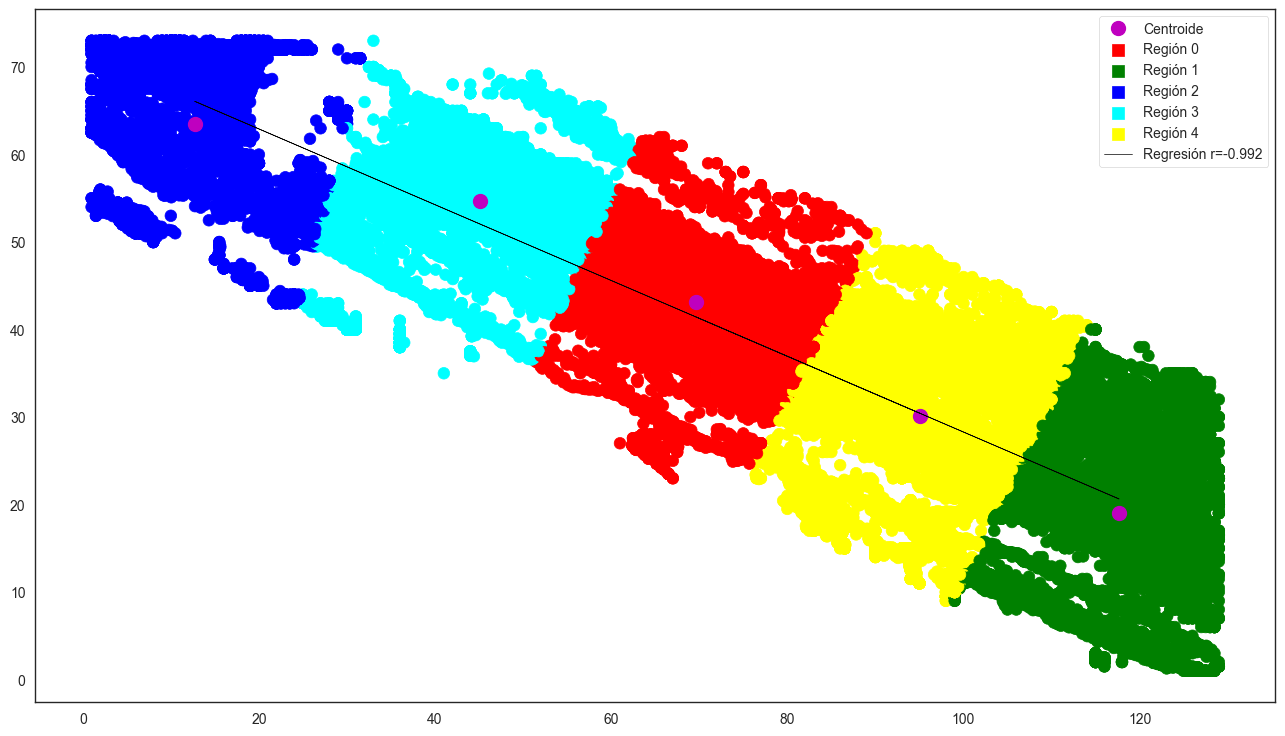

In [18]:
kmeans = KMeans(n_clusters=5).fit(X_a)

# Predicting the clusters
labels_a = kmeans.predict(X_a)

# Getting the cluster centers
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
centroidsA = centroids

asignar=[]
for row in labels_a:
    asignar.append(colors[row])
    
# Getting the values and plotting it
f1 = dataframe_a['X'].values
f2 = dataframe_a['Y'].values

fig = plt.figure()

# Plot Centroids
plt.plot(centroids[:,0], centroids[:,1], 'mo', markersize=10, label='Centroide')
plt.scatter(f1, f2, c=asignar, s=70)

for i in np.unique(labels):
    plt.scatter(centroids[i, 0], centroids[i, 1], marker='s', c=colors[i], s=70, label='Región ' + str(i))

x= centroids[:,0]
y= centroids[:,1]

# Get r-values and linear regression 
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (m) and intercept (b)
# deg=1 means linear fit (i.e. polynomial of degree 1)
m, b = np.polyfit(x, y, deg=1)

# Plot regression line
plt.plot(x, m*x+b, color='black', lw=0.5, label='Regresión r={:.3}'.format(r_value))#label=f'$y = {m:.2f}x {b:+.2f}$')

#fig.savefig(dataset+'clusters.png', transparent=True)
plt.legend(loc='best')
plt.show()

In [19]:
import statsmodels.api as sm
model = sm.OLS(x, y)
model = model.fit()
# Model summary
model.summary()

/Users/a80118/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.427
Model:                            OLS   Adj. R-squared (uncentered):              0.283
Method:                 Least Squares   F-statistic:                              2.976
Date:                Fri, 17 May 2024   Prob (F-statistic):                       0.160
Time:                        23:59:02   Log-Likelihood:                         -27.447
No. Observations:                   5   AIC:                                      56.89
Df Residuals:                       4   BIC:                                      56.50
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.1207      0.650      1.725      0.160      -0.683       2.925
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.179
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.354
Skew:                          -0.064   Prob(JB):                        0.838
Kurtosis:                       1.702   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Print centroids and color of camera C1

In [20]:
C = {}
i=0
for x,y in centroidsA:
    C[str(colors[i])+' (Región '+str(i)+')']= [x, y]
    i=i+1
    
# Create the dataframe
df = pd.DataFrame(C)

df = df.transpose()
dfCDSA = df.set_axis(['X', 'Y'], axis=1)
dfCDSA = dfCDSA.transpose()
dfCDSA

,red (Región 0),green (Región 1),blue (Región 2),cyan (Región 3),yellow (Región 4)
X,69.588344,117.670559,12.707123,45.104275,95.112359
Y,43.197053,19.054691,63.495560,54.718607,30.166066


# Run K-Means for C2
We run the algorithm for 5 clusters and obtain the labels and centroids.

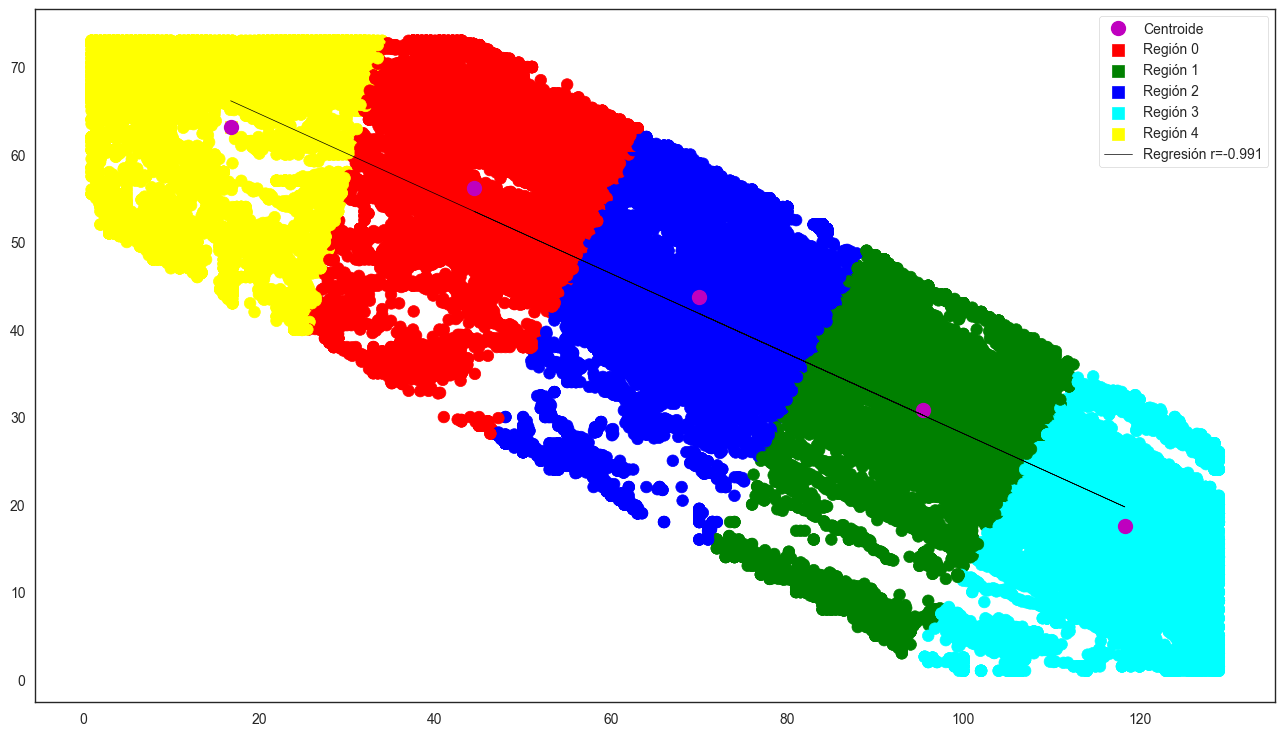

In [21]:
kmeans = KMeans(n_clusters=5).fit(X_b)

# Predicting the clusters
labels_b = kmeans.predict(X_b)

# Getting the cluster centers
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
centroidsB = centroids

asignar=[]
for row in labels_b:
    asignar.append(colors[row])
    
# Getting the values and plotting it
f1 = dataframe_b['X'].values
f2 = dataframe_b['Y'].values

fig = plt.figure()

# Plot Centroids
plt.plot(centroids[:,0],centroids[:,1],'mo',markersize=10, label='Centroide')
plt.scatter(f1, f2, c=asignar, s=70)

for i in np.unique(labels):
    plt.scatter(centroids[i, 0], centroids[i, 1], marker='s', c=colors[i], s=70, label='Región ' + str(i))

x= centroids[:,0]
y= centroids[:,1]

# Get r-values and linear regression 
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (m) and intercept (b)
# deg=1 means linear fit (i.e. polynomial of degree 1)
m, b = np.polyfit(x, y, deg=1)

# Plot regression line
plt.plot(x, m*x+b, color='black', lw=0.5, label='Regresión r={:.3}'.format(r_value))#label=f'$y = {m:.2f}x {b:+.2f}$')

#fig.savefig(dataset+'clusters.png', transparent=True)
plt.legend(loc='best')
plt.show()

# Print centroids and color of camera C2

In [22]:
C = {}
i=0
for x,y in centroidsB:
    C[str(colors[i])+' (Región '+str(i)+')']= [x, y]
    i=i+1
    
# Create the dataframe
df = pd.DataFrame(C)

df = df.transpose()
dfCDSB = df.set_axis(['X', 'Y'], axis=1)
dfCDSB = dfCDSB.transpose()
dfCDSB

,red (Región 0),green (Región 1),blue (Región 2),cyan (Región 3),yellow (Región 4)
X,44.437661,95.451164,69.996917,118.322780,16.792708
Y,56.138044,30.827136,43.741265,17.505413,63.165689


# Run K-Means for C3
We run the algorithm for 5 clusters and obtain the labels and centroids.

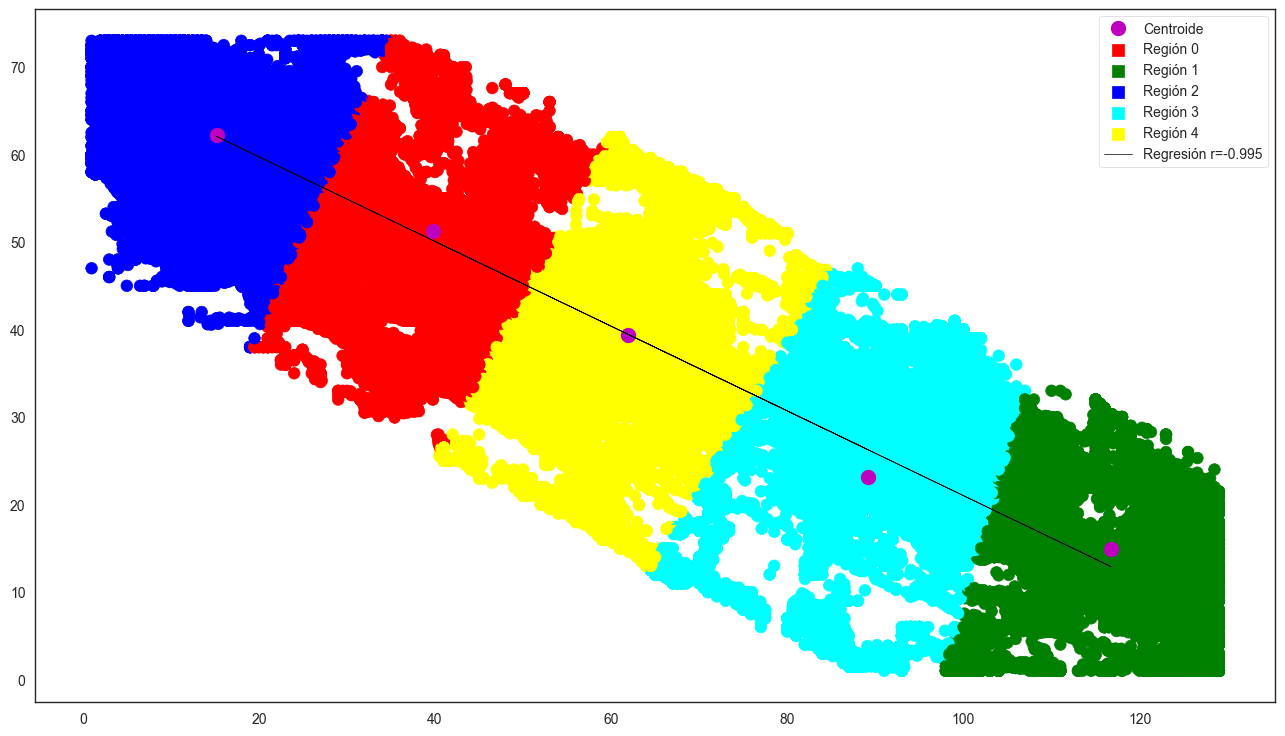

In [23]:
kmeans = KMeans(n_clusters=5).fit(X_c)

# Predicting the clusters
labels_c = kmeans.predict(X_c)

# Getting the cluster centers
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
centroidsC = centroids

asignar=[]
for row in labels_c:
    asignar.append(colors[row])
    
# Getting the values and plotting it
f1 = dataframe_c['X'].values
f2 = dataframe_c['Y'].values

fig = plt.figure()

# Plot Centroids
plt.plot(centroids[:,0],centroids[:,1],'mo',markersize=10, label='Centroide')
plt.scatter(f1, f2, c=asignar, s=70)

for i in np.unique(labels):
    plt.scatter(centroids[i, 0], centroids[i, 1], marker='s', c=colors[i], s=70, label='Región ' + str(i))

x= centroids[:,0]
y= centroids[:,1]

# Get r-values and linear regression 
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (m) and intercept (b)
# deg=1 means linear fit (i.e. polynomial of degree 1)
m, b = np.polyfit(x, y, deg=1)

# Plot regression line
plt.plot(x, m*x+b, color='black', lw=0.5, label='Regresión r={:.3}'.format(r_value))#label=f'$y = {m:.2f}x {b:+.2f}$')

#fig.savefig(dataset+'clusters.png', transparent=True)
plt.legend(loc='best')
plt.show()

In [24]:

import statsmodels.api as sm
model = sm.OLS(f1, f2)
model = model.fit()
# Model summary
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.350
Model:                            OLS   Adj. R-squared (uncentered):              0.350
Method:                 Least Squares   F-statistic:                          5.028e+04
Date:                Fri, 17 May 2024   Prob (F-statistic):                        0.00
Time:                        23:59:11   Log-Likelihood:                     -5.1179e+05
No. Observations:               93569   AIC:                                  1.024e+06
Df Residuals:                   93568   BIC:                                  1.024e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9529      0.004    224.225      0.000       0.945       0.961
==============================================================================
Omnibus:                    55624.770   Durbin-Watson:                   0.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5592.743
Skew:                           0.165   Prob(JB):                         0.00
Kurtosis:                       1.849   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Print centroids and color of camera C3

In [25]:
C = {}
i=0
for x,y in centroidsC:
    C[str(colors[i])+' (Región '+str(i)+')']= [x, y]
    i=i+1
    
# Create the dataframe
df = pd.DataFrame(C)

df = df.transpose()
dfCDSC = df.set_axis(['X', 'Y'], axis=1)
dfCDSC = dfCDSC.transpose()
dfCDSC

,red (Región 0),green (Región 1),blue (Región 2),cyan (Región 3),yellow (Región 4)
X,39.722600,116.786147,15.193106,89.179034,61.855969
Y,51.230524,14.954968,62.177686,23.122387,39.409318


# Run k-means clustering of object trajectories with elbow point value k = 5

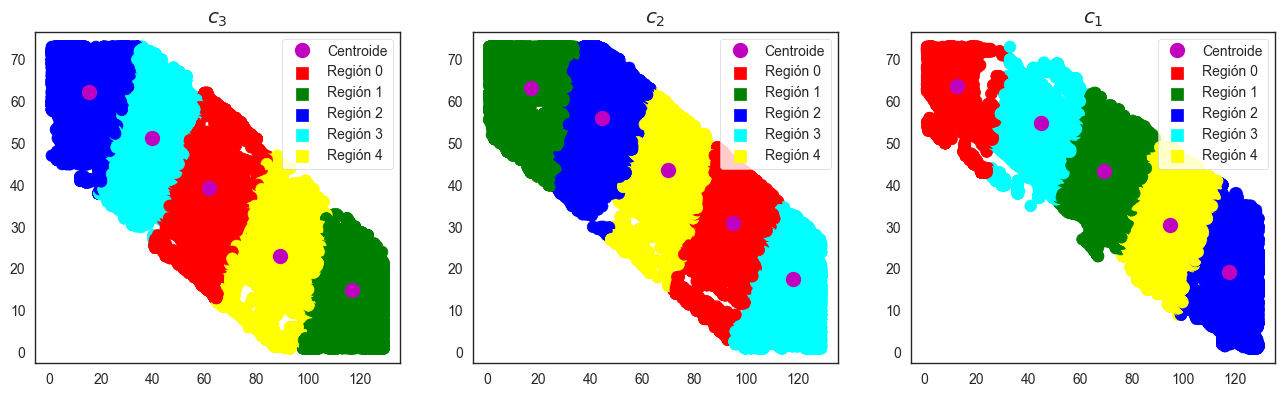

In [26]:
# Placing the plots in the plane
# Placing the plots in the plane
ax3 = plt.subplot2grid((4, 3), (0, 0), rowspan=2, colspan=1)
ax2 = plt.subplot2grid((4, 3), (0, 1), rowspan=2, colspan=1)
ax1 = plt.subplot2grid((4, 3), (0, 2), rowspan=2, colspan=1)


kmeans = KMeans(n_clusters=5).fit(X_a)

# Predicting the clusters
labels_a = kmeans.predict(X_a)
# Getting the cluster centers
centroides = kmeans.cluster_centers_
etiquetas = kmeans.labels_

asignar=[]
for row in labels_a:
    asignar.append(colors[row])
    
# Getting the values and plotting it
f1 = dataframe_a['X'].values
f2 = dataframe_a['Y'].values

#ax1.plot(X_a[etiquetas==0,0],X_a[etiquetas==0,1],'ro', label='cluster 0')
#ax1.plot(X_a[etiquetas==1,0],X_a[etiquetas==1,1],'bo', label='cluster 1')
#ax1.plot(X_a[etiquetas==2,0],X_a[etiquetas==2,1],'go', label='cluster 2')
#ax1.plot(X_a[etiquetas==3,0],X_a[etiquetas==3,1],'co', label='cluster 3')
#ax1.plot(X_a[etiquetas==4,0],X_a[etiquetas==4,1],'yo', label='cluster 4')
ax1.plot(centroides[:,0],centroides[:,1],'mo',markersize=10, label='Centroide')
ax1.scatter(f1, f2, c=asignar, s=70)
for i in np.unique(etiquetas):
    ax1.scatter(centroides[i, 0], centroides[i, 1], marker='s', c=colors[i], s=70, label='Región ' + str(i))

ax1.legend(loc='upper right')
ax1.set_title(r'$c_1$')




kmeans = KMeans(n_clusters=5).fit(X_b)

# Predicting the clusters
labels_b = kmeans.predict(X_b)
# Getting the cluster centers
centroides = kmeans.cluster_centers_
etiquetas = kmeans.labels_

asignar=[]
for row in labels_b:
    asignar.append(colors[row])
    
# Getting the values and plotting it
f1 = dataframe_b['X'].values
f2 = dataframe_b['Y'].values

#ax2.plot(X_b[etiquetas==0,0],X_b[etiquetas==0,1],'ro', label='cluster 0')
#ax2.plot(X_b[etiquetas==1,0],X_b[etiquetas==1,1],'bo', label='cluster 1')
#ax2.plot(X_b[etiquetas==2,0],X_b[etiquetas==2,1],'go', label='cluster 2')
#ax2.plot(X_b[etiquetas==3,0],X_b[etiquetas==3,1],'co', label='cluster 3')
#ax2.plot(X_b[etiquetas==4,0],X_b[etiquetas==4,1],'yo', label='cluster 4')
ax2.plot(centroides[:,0],centroides[:,1],'mo',markersize=10, label='Centroide')
ax2.scatter(f1, f2, c=asignar, s=70)
for i in np.unique(etiquetas):
    ax2.scatter(centroides[i, 0], centroides[i, 1], marker='s', c=colors[i], s=70, label='Región ' + str(i))

ax2.legend(loc='upper right')
ax2.set_title(r'$c_2$')




kmeans = KMeans(n_clusters=5).fit(X_c)

# Predicting the clusters
labels_c = kmeans.predict(X_c)
# Getting the cluster centers
centroides = kmeans.cluster_centers_
etiquetas = kmeans.labels_

asignar=[]
for row in labels_c:
    asignar.append(colors[row])
    
# Getting the values and plotting it
f1 = dataframe_c['X'].values
f2 = dataframe_c['Y'].values

#ax3.plot(X_c[etiquetas==0,0],X_c[etiquetas==0,1],'ro', label='cluster 0')
#ax3.plot(X_c[etiquetas==1,0],X_c[etiquetas==1,1],'bo', label='cluster 1')
#ax3.plot(X_c[etiquetas==2,0],X_c[etiquetas==2,1],'go', label='cluster 2')
#ax3.plot(X_c[etiquetas==3,0],X_c[etiquetas==3,1],'co', label='cluster 3')
#ax3.plot(X_c[etiquetas==4,0],X_c[etiquetas==4,1],'yo', label='cluster 4')
ax3.plot(centroides[:,0],centroides[:,1],'mo',markersize=10, label='Centroide')
ax3.scatter(f1, f2, c=asignar, s=70)
for i in np.unique(etiquetas):
    ax3.scatter(centroides[i, 0], centroides[i, 1], marker='s', c=colors[i], s=70, label='Región ' + str(i))

#plt.legend(clases, loc="upper right", title="Sizes")
ax3.legend(loc='upper right')
ax3.set_title(r'$c_3$')

plt.show()
#fig.savefig(dataset+'clusters.png', transparent=True)

# Asignar clasificación al dataset

In [27]:
#dataframe_a.drop(['CLUSTER'], axis=1)
# Using DataFrame.insert() to add a column  or DataFrame['CLUSTER']    = labels_a
dataframe_a.insert(0, "REGION", labels_a)
dataframe_a.sort_values(by=['REGION'], axis=0,  inplace=True)
print(dataframe_a)

       REGION  TARGET  AREA  PERIMETER       X       Y     STDX     STDY  \
0           0       3     9      7.476  20.000  71.000  0.86603  0.86603   
26864       0    5211    66     37.116  13.879  62.500  4.25540  1.75630   
26865       0    5211    12      9.436   8.500  51.000  1.16770  0.85280   
26866       0    5211    15     11.396   8.000  51.000  1.46390  0.84515   
26867       0    5211    62     35.404  14.194  62.887  4.28430  1.59000   
...       ...     ...   ...        ...     ...     ...      ...      ...   
28622       4    5260    62     26.117  83.516  22.532  2.55910  2.02220   
28621       4    5260    66     28.168  83.288  22.409  2.74430  2.03790   
28620       4    5260    58     25.166  83.397  22.190  2.55430  1.87740   
28618       4    5260    62     25.836  83.468  22.435  2.50060  2.04560   
25379       4    5086    45     27.655  81.667  19.667  3.68040  1.04450   

           CIR  EULER  HARRIS     MHU1      MHU2      MHU3      MHU4  
0      1.00000  

In [28]:
dataframe_b.insert(0, "REGION", labels_b)
dataframe_b.sort_values(by=['REGION'], axis=0,  inplace=True)
print(dataframe_b)

       REGION  TARGET  AREA  PERIMETER        X       Y     STDX     STDY  \
44121       0    5976    16     11.396   88.500  41.500  1.15470  1.15470   
43173       0    5875    15     10.751  100.400  31.400  1.12120  1.12120   
43172       0    5875    12      9.436  100.500  31.000  1.16770  0.85280   
43171       0    5875    15     11.396  101.000  31.000  0.84515  1.46390   
43170       0    5875    12      9.436  100.500  31.000  1.16770  0.85280   
...       ...     ...   ...        ...      ...     ...      ...      ...   
74063       4   11894    15     11.396   64.000  62.000  1.46390  0.84515   
74062       4   11894    36     23.553   64.417  59.917  1.71340  2.40680   
74061       4   11894    55     27.961   64.000  59.527  1.99070  2.62360   
34383       4    3267    12      9.436   84.000  51.500  0.85280  1.16770   
22903       4    2081   231     58.296   70.732  31.576  5.81950  3.32740   

           CIR  EULER  HARRIS     MHU1      MHU2      MHU3      MHU4  
4412

In [29]:
dataframe_c.insert(0, "REGION", labels_c)
dataframe_c.sort_values(by=['REGION'], axis=0,  inplace=True)
print(dataframe_c)

       REGION  TARGET  AREA  PERIMETER       X       Y     STDX     STDY  \
60392       0    6663   154     64.738  67.675  51.175  4.52280  3.71910   
40114       0    4767    22     14.026  58.500  41.500  1.65470  1.10190   
40113       0    4767    19     12.711  58.895  41.421  1.41010  1.12130   
14132       0    1122   340     92.807  60.562  49.656  9.24270  3.78190   
14131       0    1122   319     94.767  59.520  49.856  9.13070  3.57020   
...       ...     ...   ...        ...     ...     ...      ...      ...   
39686       4    4742    20     13.935  88.400  35.650  1.69830  1.04000   
39687       4    4742     9      7.476  88.000  36.000  0.86603  0.86603   
39688       4    4742    12      9.436  88.500  36.000  1.16770  0.85280   
6280        4     412    15     10.751  84.600  31.600  1.12120  1.12120   
6107        4     405    76     41.309  95.171  33.079  5.41700  1.38340   

           CIR  EULER  HARRIS     MHU1      MHU2      MHU3      MHU4  
60392  0.59091  

In [30]:
dataframe_a.to_csv('featuresA.csv')
dataframe_b.to_csv('featuresB.csv')
dataframe_c.to_csv('featuresC.csv')

In [31]:
#dfA = dataframe_a[dataframe_a['CLUSTER'] == 0]
#dfB = dataframe_b[dataframe_b['CLUSTER'] == 0]
#dfC = dataframe_c[dataframe_c['CLUSTER'] == 0]

In [32]:
#dfA.head()
#dfB.head()
#dfC.head()

# Correlation between clusters of each characteristic of C1, C2 & C3.

In [33]:
clusters = np.array([0,1,2,3,4])
#clusters = np.array([0,1])
print(clusters)

cameras = np.array(['A', 'B', 'C'])
#cameras = np.array(['A'])
print(cameras)

measurements = np.array(['AREA', 'PERIMETER', 'CIR','EULER','HARRIS','MHU1'])
print(measurements)


[0 1 2 3 4]
['A' 'B' 'C']
['AREA' 'PERIMETER' 'CIR' 'EULER' 'HARRIS' 'MHU1']


/var/folders/m2/fwpdyffx07vfrssrjrwss6jc0000gn/T/ipykernel_9293/743008421.py:66: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax1.get_shared_y_axes().join(ax2,ax3)
/var/folders/m2/fwpdyffx07vfrssrjrwss6jc0000gn/T/ipykernel_9293/743008421.py:74: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  g1 = sb.heatmap(corr_matrix, mask=mask, annot = True, vmin=-1, vmax=1, center=0, cmap=plt.cm.get_cmap('coolwarm').reversed(), square=True, linewidth=.5, fmt=".2f", cbar=False, ax=ax1, annot_kws={"fontsize":7})
/var/folders/m2/fwpdyffx07vfrssrjrwss6jc0000gn/T/ipykernel_9293/743008421.py:88: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[nam

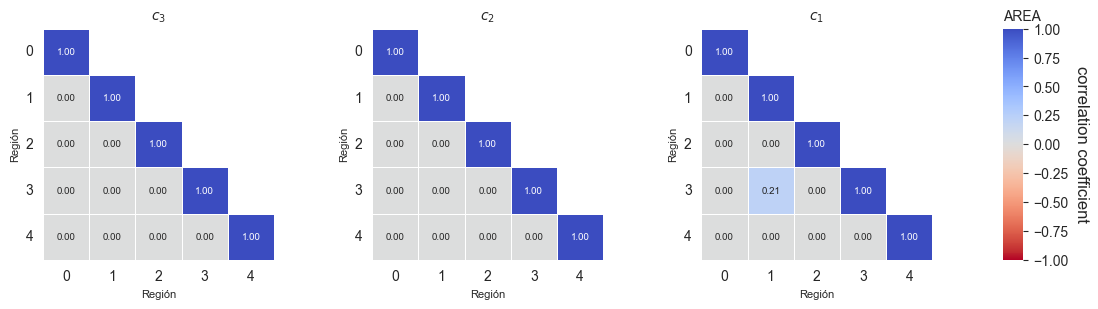

/var/folders/m2/fwpdyffx07vfrssrjrwss6jc0000gn/T/ipykernel_9293/743008421.py:123: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  g4 = sb.heatmap(corr_matrix, mask=mask, annot = True, vmin=-1, vmax=1, center=0, cmap=plt.cm.get_cmap('coolwarm').reversed(), square=True, linewidth=.5, fmt=".2f", annot_kws={"fontsize":7})


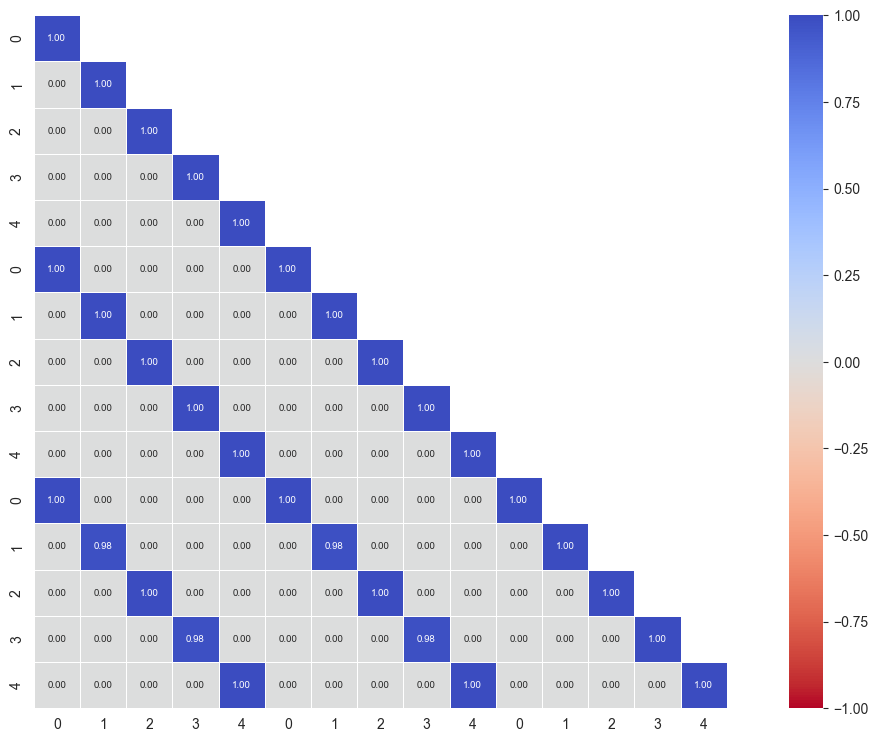

/var/folders/m2/fwpdyffx07vfrssrjrwss6jc0000gn/T/ipykernel_9293/743008421.py:66: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax1.get_shared_y_axes().join(ax2,ax3)
/var/folders/m2/fwpdyffx07vfrssrjrwss6jc0000gn/T/ipykernel_9293/743008421.py:74: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  g1 = sb.heatmap(corr_matrix, mask=mask, annot = True, vmin=-1, vmax=1, center=0, cmap=plt.cm.get_cmap('coolwarm').reversed(), square=True, linewidth=.5, fmt=".2f", cbar=False, ax=ax1, annot_kws={"fontsize":7})
/var/folders/m2/fwpdyffx07vfrssrjrwss6jc0000gn/T/ipykernel_9293/743008421.py:88: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[nam

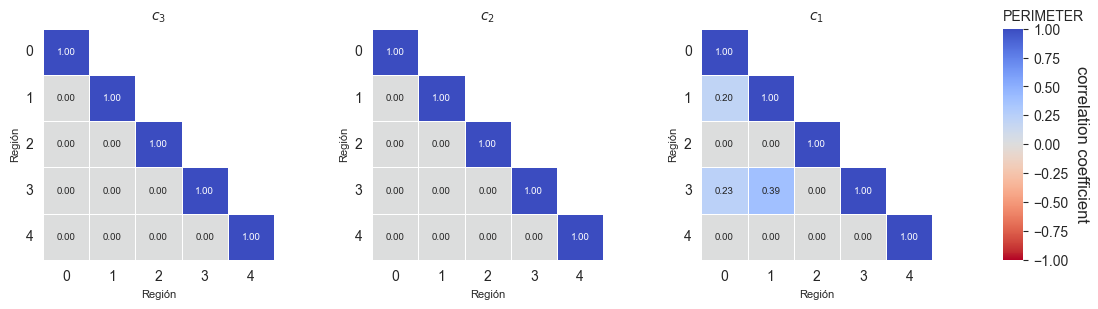

/var/folders/m2/fwpdyffx07vfrssrjrwss6jc0000gn/T/ipykernel_9293/743008421.py:123: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  g4 = sb.heatmap(corr_matrix, mask=mask, annot = True, vmin=-1, vmax=1, center=0, cmap=plt.cm.get_cmap('coolwarm').reversed(), square=True, linewidth=.5, fmt=".2f", annot_kws={"fontsize":7})


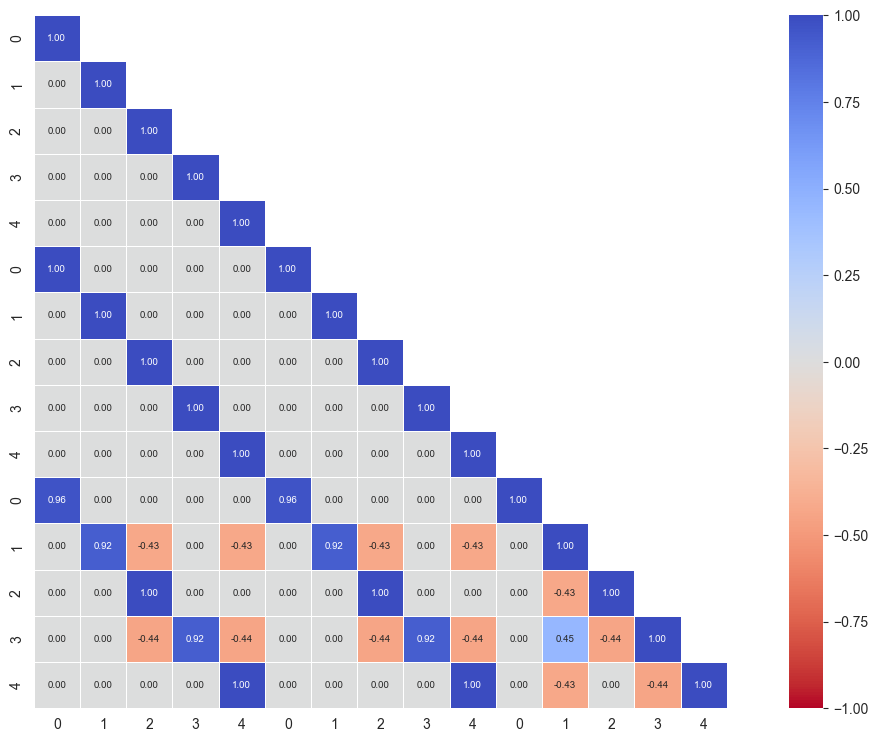

/var/folders/m2/fwpdyffx07vfrssrjrwss6jc0000gn/T/ipykernel_9293/743008421.py:66: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax1.get_shared_y_axes().join(ax2,ax3)
/var/folders/m2/fwpdyffx07vfrssrjrwss6jc0000gn/T/ipykernel_9293/743008421.py:74: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  g1 = sb.heatmap(corr_matrix, mask=mask, annot = True, vmin=-1, vmax=1, center=0, cmap=plt.cm.get_cmap('coolwarm').reversed(), square=True, linewidth=.5, fmt=".2f", cbar=False, ax=ax1, annot_kws={"fontsize":7})
/var/folders/m2/fwpdyffx07vfrssrjrwss6jc0000gn/T/ipykernel_9293/743008421.py:88: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[nam

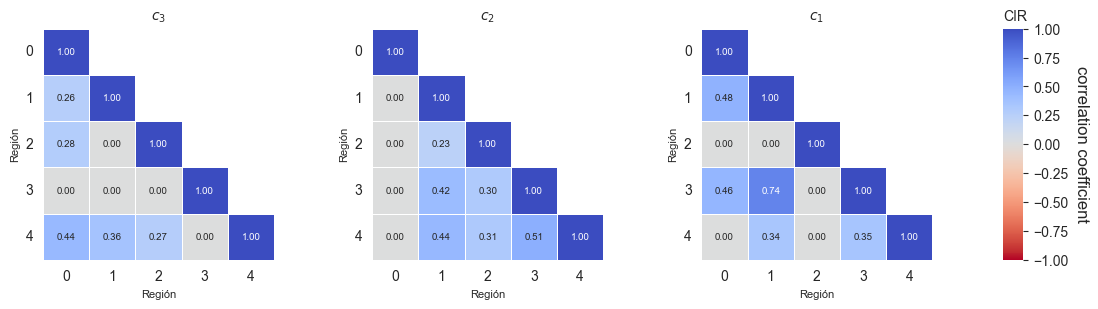

/var/folders/m2/fwpdyffx07vfrssrjrwss6jc0000gn/T/ipykernel_9293/743008421.py:123: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  g4 = sb.heatmap(corr_matrix, mask=mask, annot = True, vmin=-1, vmax=1, center=0, cmap=plt.cm.get_cmap('coolwarm').reversed(), square=True, linewidth=.5, fmt=".2f", annot_kws={"fontsize":7})


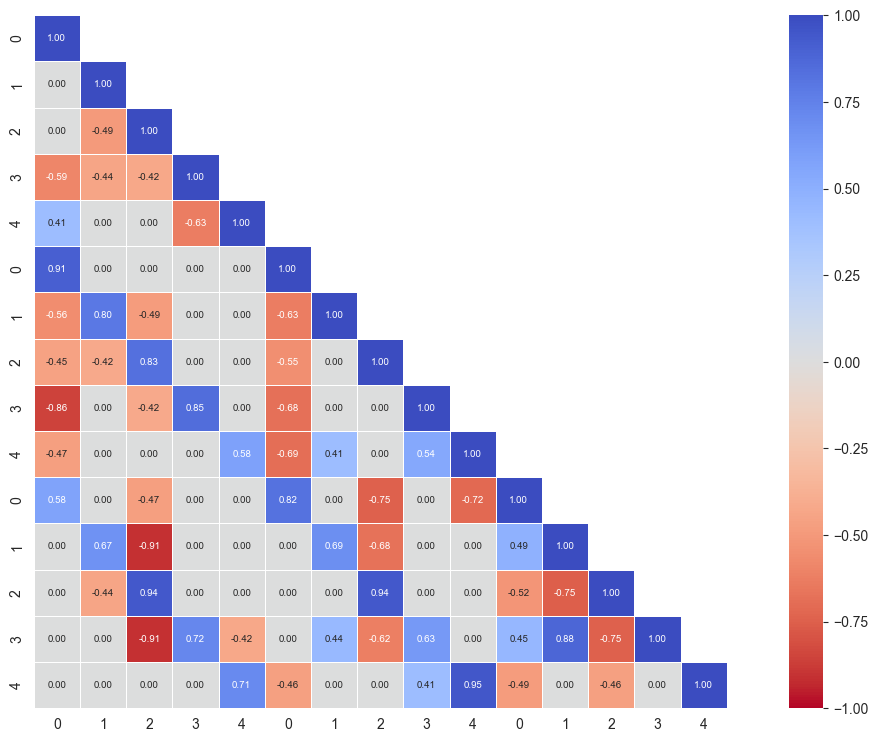

/var/folders/m2/fwpdyffx07vfrssrjrwss6jc0000gn/T/ipykernel_9293/743008421.py:66: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax1.get_shared_y_axes().join(ax2,ax3)
/var/folders/m2/fwpdyffx07vfrssrjrwss6jc0000gn/T/ipykernel_9293/743008421.py:74: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  g1 = sb.heatmap(corr_matrix, mask=mask, annot = True, vmin=-1, vmax=1, center=0, cmap=plt.cm.get_cmap('coolwarm').reversed(), square=True, linewidth=.5, fmt=".2f", cbar=False, ax=ax1, annot_kws={"fontsize":7})
/var/folders/m2/fwpdyffx07vfrssrjrwss6jc0000gn/T/ipykernel_9293/743008421.py:88: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[nam

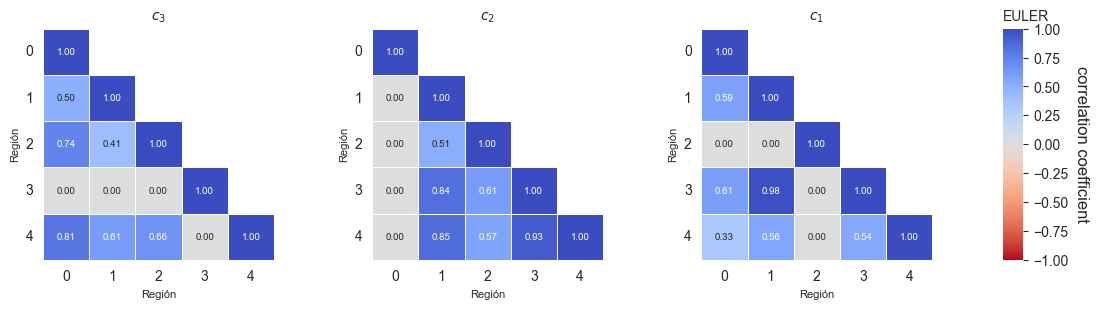

/var/folders/m2/fwpdyffx07vfrssrjrwss6jc0000gn/T/ipykernel_9293/743008421.py:123: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  g4 = sb.heatmap(corr_matrix, mask=mask, annot = True, vmin=-1, vmax=1, center=0, cmap=plt.cm.get_cmap('coolwarm').reversed(), square=True, linewidth=.5, fmt=".2f", annot_kws={"fontsize":7})


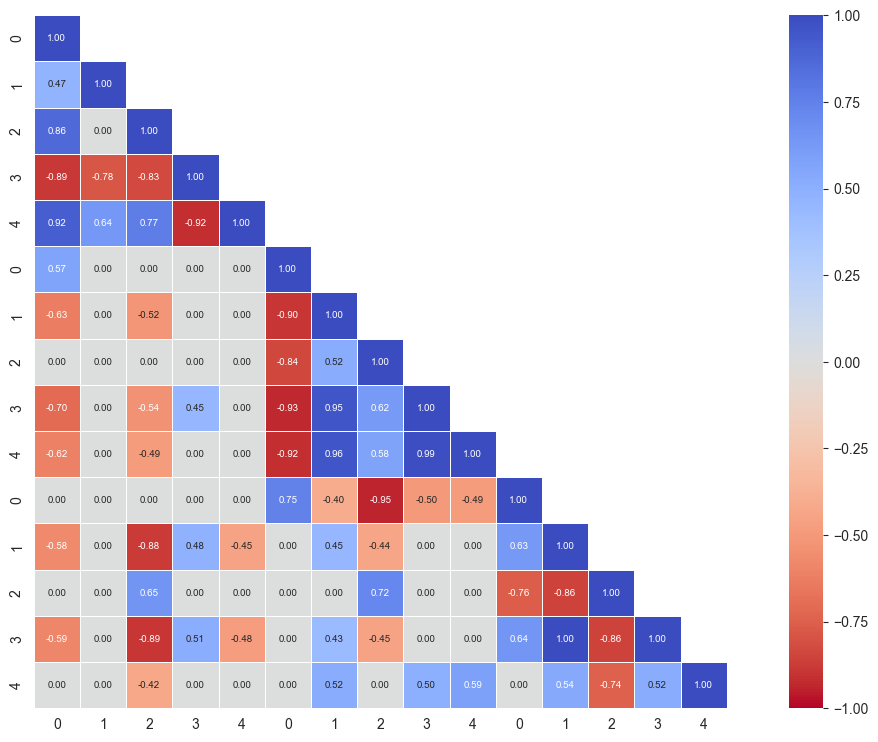

/var/folders/m2/fwpdyffx07vfrssrjrwss6jc0000gn/T/ipykernel_9293/743008421.py:66: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax1.get_shared_y_axes().join(ax2,ax3)
/var/folders/m2/fwpdyffx07vfrssrjrwss6jc0000gn/T/ipykernel_9293/743008421.py:74: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  g1 = sb.heatmap(corr_matrix, mask=mask, annot = True, vmin=-1, vmax=1, center=0, cmap=plt.cm.get_cmap('coolwarm').reversed(), square=True, linewidth=.5, fmt=".2f", cbar=False, ax=ax1, annot_kws={"fontsize":7})
/var/folders/m2/fwpdyffx07vfrssrjrwss6jc0000gn/T/ipykernel_9293/743008421.py:88: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[nam

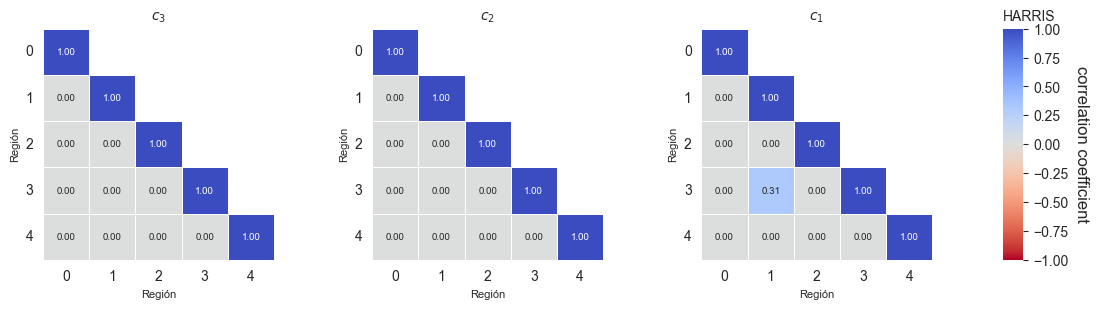

/var/folders/m2/fwpdyffx07vfrssrjrwss6jc0000gn/T/ipykernel_9293/743008421.py:123: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  g4 = sb.heatmap(corr_matrix, mask=mask, annot = True, vmin=-1, vmax=1, center=0, cmap=plt.cm.get_cmap('coolwarm').reversed(), square=True, linewidth=.5, fmt=".2f", annot_kws={"fontsize":7})


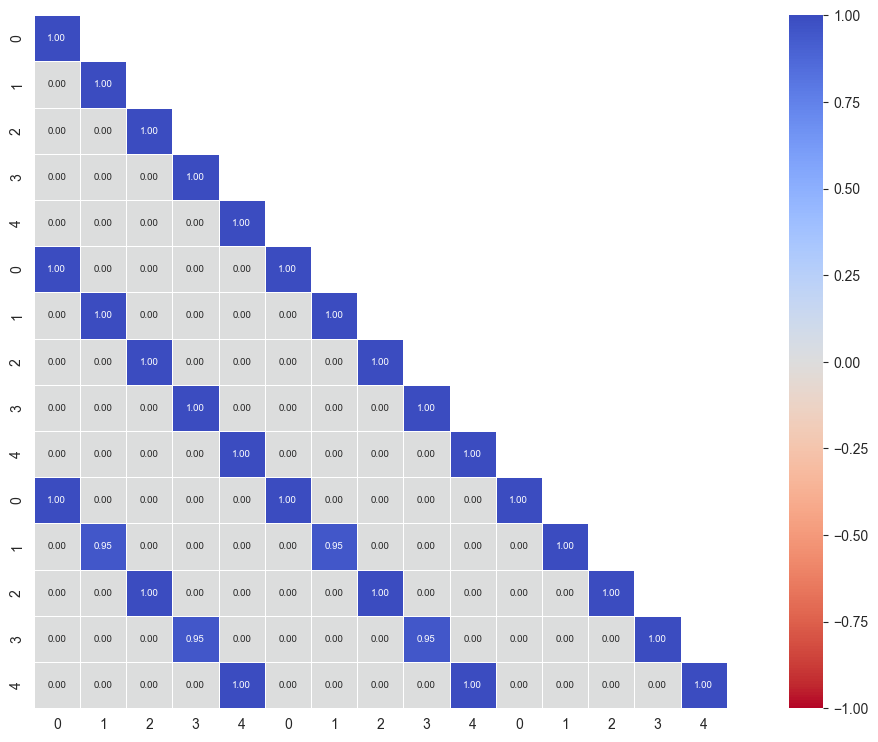

/var/folders/m2/fwpdyffx07vfrssrjrwss6jc0000gn/T/ipykernel_9293/743008421.py:66: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax1.get_shared_y_axes().join(ax2,ax3)
/var/folders/m2/fwpdyffx07vfrssrjrwss6jc0000gn/T/ipykernel_9293/743008421.py:74: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  g1 = sb.heatmap(corr_matrix, mask=mask, annot = True, vmin=-1, vmax=1, center=0, cmap=plt.cm.get_cmap('coolwarm').reversed(), square=True, linewidth=.5, fmt=".2f", cbar=False, ax=ax1, annot_kws={"fontsize":7})
/var/folders/m2/fwpdyffx07vfrssrjrwss6jc0000gn/T/ipykernel_9293/743008421.py:88: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[nam

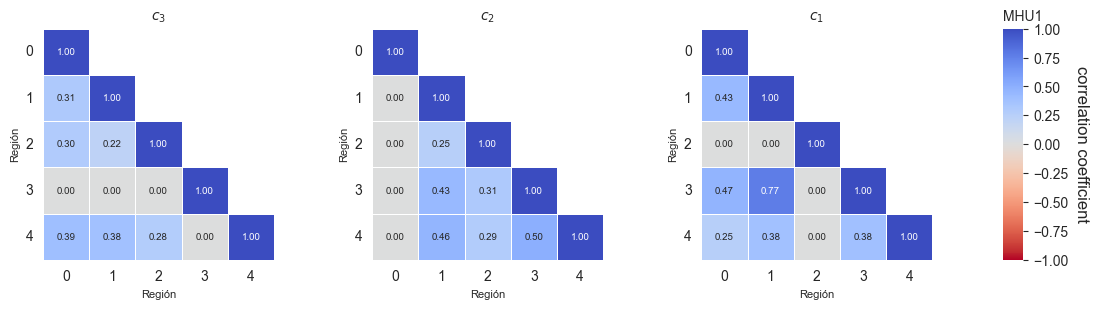

/var/folders/m2/fwpdyffx07vfrssrjrwss6jc0000gn/T/ipykernel_9293/743008421.py:123: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  g4 = sb.heatmap(corr_matrix, mask=mask, annot = True, vmin=-1, vmax=1, center=0, cmap=plt.cm.get_cmap('coolwarm').reversed(), square=True, linewidth=.5, fmt=".2f", annot_kws={"fontsize":7})


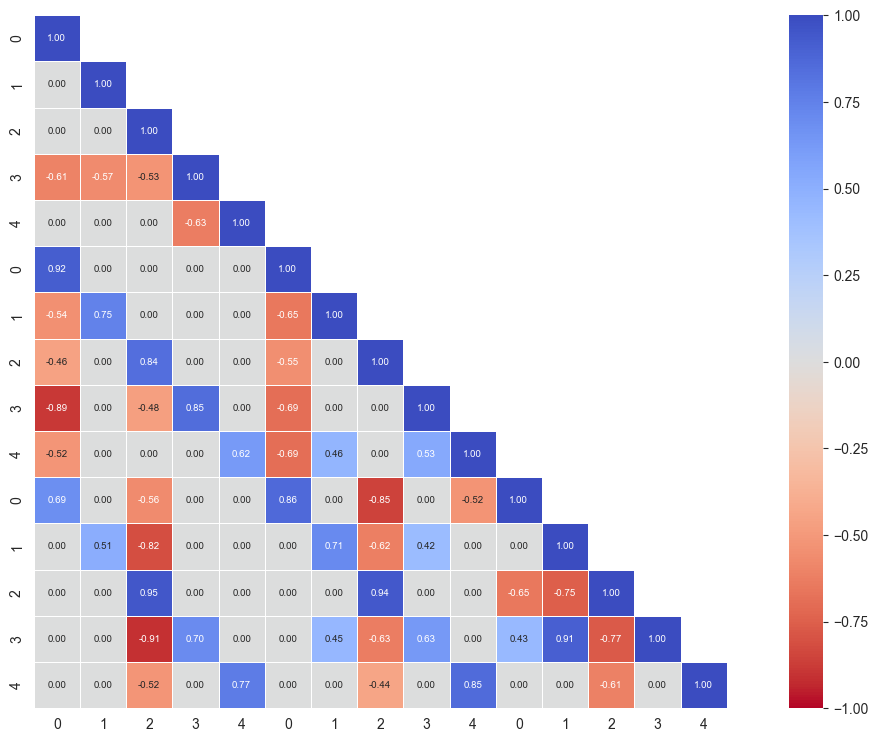

In [34]:
import seaborn as sb

# Change the Background Color of Seaborn Plots
sb.set_style("white")

# Cycle to iterate in measurements labels
for measure in measurements:
    c = 0
    dfA = pd.DataFrame()
    dfB = pd.DataFrame()
    dfC = pd.DataFrame()
    
    # Cycle to iterate in cameras
    for camera in cameras:
        if camera == 'A':
            c = 0
            df = dataframe_a
        elif camera == 'B':
            c = 1
            df = dataframe_b
        else:
            c = 2
            df = dataframe_c
        
        # Get CLUSTER and MEASURE columns only
        feature = df[['REGION', str(measure)]]
        
        # Init vars
        columns = {}
        lenFeatures = np.array([0])
        
        # Cycle to iterate in cluster types
        for cluster in clusters:
            col = feature.loc[feature.REGION == cluster, [str(measure)]]
            columns[str(cluster)] = col[str(measure)].to_numpy()
            #print('df: '+ str(len(df)) + " measure: " + str(len(feature)) + " cluster: " + str(len(columns[str(cluster)])))
            lenFeatures = np.concatenate((lenFeatures, [len(columns[str(cluster)])]))
        
        # get max value from lenFeatures array
        nMax = lenFeatures.max()
        
        newColumns = {}
        for key, value in columns.items():
            newfeature = value
            #print(key, value)
                
            if (nMax - len(value)) > 0 :
                zeros = np.zeros(nMax - len(value))           # define constant with ceros
                newfeature = np.concatenate((value,zeros))
            newColumns[str(key)] = newfeature
            
        #print(newColumns)
        
        # Create the dataframe
        df2 = pd.DataFrame(newColumns)
        #ax = sns.heatmap(df2.corr(method='pearson'), annot=True, vmin=-1, vmax=1, center=0,cmap=plt.cm.get_cmap('coolwarm').reversed(), square=True, linewidth=.5, fmt=".3f")
      
        if camera == 'A':
            dfA = df2
        elif camera == 'B':
            dfB = df2
        else:
            dfC = df2
            
    fig,(ax1,ax2,ax3, axcb) = plt.subplots(nrows=1, ncols=4, gridspec_kw={'width_ratios':[1,1,1,0.07]}, figsize=(13,3))
    ax1.get_shared_y_axes().join(ax2,ax3)
    
    # Calculate correlation between each pair of variable
    corr_matrix = dfC.corr(method='pearson')
    corr_matrix[np.abs(corr_matrix)<.2] = 0.0001
    dnc3 = corr_matrix
    mask = np.triu(corr_matrix)
    np.fill_diagonal(mask, False)
    g1 = sb.heatmap(corr_matrix, mask=mask, annot = True, vmin=-1, vmax=1, center=0, cmap=plt.cm.get_cmap('coolwarm').reversed(), square=True, linewidth=.5, fmt=".2f", cbar=False, ax=ax1, annot_kws={"fontsize":7})
    g1.set_title(r'$c_3$', fontsize = 10)
    g1.set_xlabel('Región', fontsize = 8)
    g1.set_ylabel('Región', fontsize = 8)
    #g1.yaxis.tick_right()
    #g1.set_ylabel(measure, fontsize = 10)
    g1.tick_params(axis='y', labelrotation=0)
                    
    # Calculate correlation between each pair of variable
    corr_matrix = dfB.corr(method='pearson')
    corr_matrix[np.abs(corr_matrix)<.2] = 0.0001
    dnc2 = corr_matrix
    mask = np.triu(corr_matrix)
    np.fill_diagonal(mask, False)
    g2 = sb.heatmap(corr_matrix, mask=mask, annot = True, vmin=-1, vmax=1, center=0, cmap=plt.cm.get_cmap('coolwarm').reversed(), square=True, linewidth=.5, fmt=".2f",cbar=False, ax=ax2, annot_kws={"fontsize":7})
    g2.set_title(r'$c_2$', fontsize = 10)
    g2.set_xlabel('Región', fontsize = 8)
    g2.set_ylabel('Región', fontsize = 8)
    #g2.set_ylabel('')
    #g2.set_yticks([])
    #g2.yaxis.tick_right()
    g2.tick_params(axis='y', labelrotation=0)
    
    # Calculate correlation between each pair of variable
    corr_matrix = dfA.corr(method='pearson')
    corr_matrix[np.abs(corr_matrix)<.2] = 0.0001
    dnc1 = corr_matrix
    mask = np.triu(corr_matrix)
    np.fill_diagonal(mask, False)
    g3 = sb.heatmap(corr_matrix, mask=mask, annot = True, vmin=-1, vmax=1, center=0, cmap=plt.cm.get_cmap('coolwarm').reversed(), square=True, linewidth=.5, fmt=".2f",ax=ax3, annot_kws={"fontsize":7}, cbar_ax=axcb)
    g3.set_title(r'$c_1$', fontsize = 10)
    g3.set_xlabel('Región', fontsize = 8)
    g3.set_ylabel('Región', fontsize = 8)
    #g3.set_ylabel('')
    #g3.set_yticks([])
    #g3.yaxis.tick_right()
    g3.tick_params(axis='y', labelrotation=0)
    axcb.set_ylabel('correlation coefficient', rotation=-90, va="bottom")
    plt.title(measure, loc='left', fontsize = 10)
    plt.show()
    
    # When gluing together multiple DataFrames (Take the union of them all, join='outer' | Take the intersection, join='inner')
    gluing = pd.concat([dnc3, dnc2, dnc1], axis=1, join="outer")
    # Calculate correlation between each pair of variable
    corr_matrix = gluing.corr(method='pearson')
    corr_matrix[np.abs(corr_matrix)<.4] = 0.0001
    plt.figure()
    mask = np.triu(corr_matrix)
    np.fill_diagonal(mask, False)
    g4 = sb.heatmap(corr_matrix, mask=mask, annot = True, vmin=-1, vmax=1, center=0, cmap=plt.cm.get_cmap('coolwarm').reversed(), square=True, linewidth=.5, fmt=".2f", annot_kws={"fontsize":7})
    plt.show()



    

In [35]:
corr_matrix

,0,1,2,3,4,0,1,2,3,4,0,1,2,3,4
0,1.000000,0.000100,0.000100,-0.606174,0.000100,0.915373,-0.544081,-0.458412,-0.887662,-0.522237,0.685768,0.000100,0.000100,0.000100,0.000100
1,0.000100,1.000000,0.000100,-0.567492,0.000100,0.000100,0.748338,0.000100,0.000100,0.000100,0.000100,0.513261,0.000100,0.000100,0.000100
2,0.000100,0.000100,1.000000,-0.530595,0.000100,0.000100,0.000100,0.838132,-0.476324,0.000100,-0.563482,-0.815783,0.950100,-0.913435,-0.516109
3,-0.606174,-0.567492,-0.530595,1.000000,-0.625064,0.000100,0.000100,0.000100,0.847872,0.000100,0.000100,0.000100,0.000100,0.696074,0.000100
4,0.000100,0.000100,0.000100,-0.625064,1.000000,0.000100,0.000100,0.000100,0.000100,0.621358,0.000100,0.000100,0.000100,0.000100,0.773700
0,0.915373,0.000100,0.000100,0.000100,0.000100,1.000000,-0.652377,-0.553388,-0.690543,-0.689955,0.862422,0.000100,0.000100,0.000100,0.000100
1,-0.544081,0.748338,0.000100,0.000100,0.000100,-0.652377,1.000000,0.000100,0.000100,0.462056,0.000100,0.707676,0.000100,0.445419,0.000100
2,-0.458412,0.000100,0.838132,0.000100,0.000100,-0.553388,0.000100,1.000000,0.000100,0.000100,-0.854115,-0.619991,0.943136,-0.627625,-0.442235
3,-0.887662,0.000100,-0.476324,0.847872,0.000100,-0.690543,0.000100,0.000100,1.000000,0.533583,0.000100,0.419159,0.000100,0.626383,0.000100
4,-0.522237,0.000100,0.000100,0.000100,0.621358,-0.689955,0.462056,0.000100,0.533583,1.000000,-0.523903,0.000100,0.000100,0.000100,0.854309


In [36]:
dfgral = pd.DataFrame(corr_matrix)
dfgral

,0,1,2,3,4,0,1,2,3,4,0,1,2,3,4
0,1.000000,0.000100,0.000100,-0.606174,0.000100,0.915373,-0.544081,-0.458412,-0.887662,-0.522237,0.685768,0.000100,0.000100,0.000100,0.000100
1,0.000100,1.000000,0.000100,-0.567492,0.000100,0.000100,0.748338,0.000100,0.000100,0.000100,0.000100,0.513261,0.000100,0.000100,0.000100
2,0.000100,0.000100,1.000000,-0.530595,0.000100,0.000100,0.000100,0.838132,-0.476324,0.000100,-0.563482,-0.815783,0.950100,-0.913435,-0.516109
3,-0.606174,-0.567492,-0.530595,1.000000,-0.625064,0.000100,0.000100,0.000100,0.847872,0.000100,0.000100,0.000100,0.000100,0.696074,0.000100
4,0.000100,0.000100,0.000100,-0.625064,1.000000,0.000100,0.000100,0.000100,0.000100,0.621358,0.000100,0.000100,0.000100,0.000100,0.773700
0,0.915373,0.000100,0.000100,0.000100,0.000100,1.000000,-0.652377,-0.553388,-0.690543,-0.689955,0.862422,0.000100,0.000100,0.000100,0.000100
1,-0.544081,0.748338,0.000100,0.000100,0.000100,-0.652377,1.000000,0.000100,0.000100,0.462056,0.000100,0.707676,0.000100,0.445419,0.000100
2,-0.458412,0.000100,0.838132,0.000100,0.000100,-0.553388,0.000100,1.000000,0.000100,0.000100,-0.854115,-0.619991,0.943136,-0.627625,-0.442235
3,-0.887662,0.000100,-0.476324,0.847872,0.000100,-0.690543,0.000100,0.000100,1.000000,0.533583,0.000100,0.419159,0.000100,0.626383,0.000100
4,-0.522237,0.000100,0.000100,0.000100,0.621358,-0.689955,0.462056,0.000100,0.533583,1.000000,-0.523903,0.000100,0.000100,0.000100,0.854309


In [37]:
gluing

,0,1,2,3,4,0,1,2,3,4,0,1,2,3,4
0,1.000000,0.306032,0.295093,0.0001,0.391043,1.0000,0.000100,0.000100,0.000100,0.000100,1.000000,0.431952,0.0001,0.473156,0.252909
1,0.306032,1.000000,0.218475,0.0001,0.375604,0.0001,1.000000,0.252286,0.433147,0.463744,0.431952,1.000000,0.0001,0.767180,0.381057
2,0.295093,0.218475,1.000000,0.0001,0.278362,0.0001,0.252286,1.000000,0.308381,0.288459,0.000100,0.000100,1.0000,0.000100,0.000100
3,0.000100,0.000100,0.000100,1.0000,0.000100,0.0001,0.433147,0.308381,1.000000,0.502981,0.473156,0.767180,0.0001,1.000000,0.383988
4,0.391043,0.375604,0.278362,0.0001,1.000000,0.0001,0.463744,0.288459,0.502981,1.000000,0.252909,0.381057,0.0001,0.383988,1.000000


In [39]:
# When gluing together multiple DataFrames (Take the union of them all, join='outer' | Take the intersection, join='inner')
result = pd.concat([dfgral, dfgral, dfgral], axis=1, join="outer")
result

,0,1,2,3,4,0,1,2,3,4,...,0,1,2,3,4,0,1,2,3,4
0,1.000000,0.000100,0.000100,-0.606174,0.000100,0.915373,-0.544081,-0.458412,-0.887662,-0.522237,...,0.915373,-0.544081,-0.458412,-0.887662,-0.522237,0.685768,0.000100,0.000100,0.000100,0.000100
1,0.000100,1.000000,0.000100,-0.567492,0.000100,0.000100,0.748338,0.000100,0.000100,0.000100,...,0.000100,0.748338,0.000100,0.000100,0.000100,0.000100,0.513261,0.000100,0.000100,0.000100
2,0.000100,0.000100,1.000000,-0.530595,0.000100,0.000100,0.000100,0.838132,-0.476324,0.000100,...,0.000100,0.000100,0.838132,-0.476324,0.000100,-0.563482,-0.815783,0.950100,-0.913435,-0.516109
3,-0.606174,-0.567492,-0.530595,1.000000,-0.625064,0.000100,0.000100,0.000100,0.847872,0.000100,...,0.000100,0.000100,0.000100,0.847872,0.000100,0.000100,0.000100,0.000100,0.696074,0.000100
4,0.000100,0.000100,0.000100,-0.625064,1.000000,0.000100,0.000100,0.000100,0.000100,0.621358,...,0.000100,0.000100,0.000100,0.000100,0.621358,0.000100,0.000100,0.000100,0.000100,0.773700
0,0.915373,0.000100,0.000100,0.000100,0.000100,1.000000,-0.652377,-0.553388,-0.690543,-0.689955,...,1.000000,-0.652377,-0.553388,-0.690543,-0.689955,0.862422,0.000100,0.000100,0.000100,0.000100
1,-0.544081,0.748338,0.000100,0.000100,0.000100,-0.652377,1.000000,0.000100,0.000100,0.462056,...,-0.652377,1.000000,0.000100,0.000100,0.462056,0.000100,0.707676,0.000100,0.445419,0.000100
2,-0.458412,0.000100,0.838132,0.000100,0.000100,-0.553388,0.000100,1.000000,0.000100,0.000100,...,-0.553388,0.000100,1.000000,0.000100,0.000100,-0.854115,-0.619991,0.943136,-0.627625,-0.442235
3,-0.887662,0.000100,-0.476324,0.847872,0.000100,-0.690543,0.000100,0.000100,1.000000,0.533583,...,-0.690543,0.000100,0.000100,1.000000,0.533583,0.000100,0.419159,0.000100,0.626383,0.000100
4,-0.522237,0.000100,0.000100,0.000100,0.621358,-0.689955,0.462056,0.000100,0.533583,1.000000,...,-0.689955,0.462056,0.000100,0.533583,1.000000,-0.523903,0.000100,0.000100,0.000100,0.854309


/var/folders/m2/fwpdyffx07vfrssrjrwss6jc0000gn/T/ipykernel_9293/3601010814.py:68: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax1.get_shared_y_axes().join(ax2,ax3)
/var/folders/m2/fwpdyffx07vfrssrjrwss6jc0000gn/T/ipykernel_9293/3601010814.py:76: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  g1 = sb.heatmap(corr_matrix, mask=mask, annot = True, vmin=-1, vmax=1, center=0, cmap=plt.cm.get_cmap('coolwarm').reversed(), square=True, linewidth=.5, fmt=".2f", cbar=False, ax=ax1, annot_kws={"fontsize":7})
/var/folders/m2/fwpdyffx07vfrssrjrwss6jc0000gn/T/ipykernel_9293/3601010814.py:90: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[

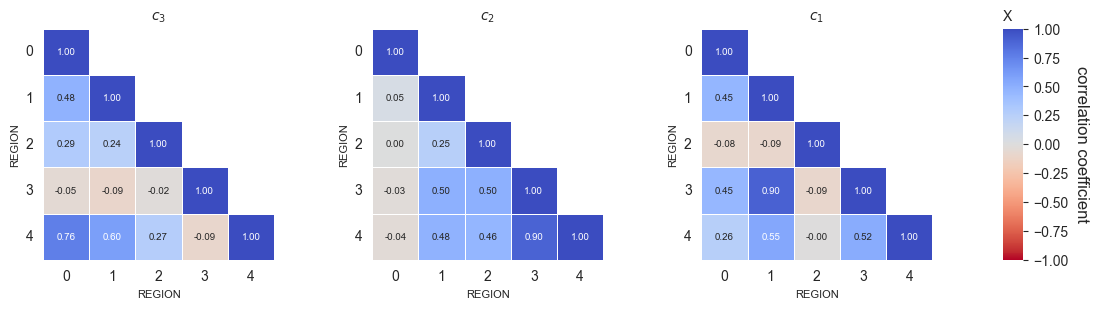

/var/folders/m2/fwpdyffx07vfrssrjrwss6jc0000gn/T/ipykernel_9293/3601010814.py:68: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax1.get_shared_y_axes().join(ax2,ax3)
/var/folders/m2/fwpdyffx07vfrssrjrwss6jc0000gn/T/ipykernel_9293/3601010814.py:76: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  g1 = sb.heatmap(corr_matrix, mask=mask, annot = True, vmin=-1, vmax=1, center=0, cmap=plt.cm.get_cmap('coolwarm').reversed(), square=True, linewidth=.5, fmt=".2f", cbar=False, ax=ax1, annot_kws={"fontsize":7})
/var/folders/m2/fwpdyffx07vfrssrjrwss6jc0000gn/T/ipykernel_9293/3601010814.py:90: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[

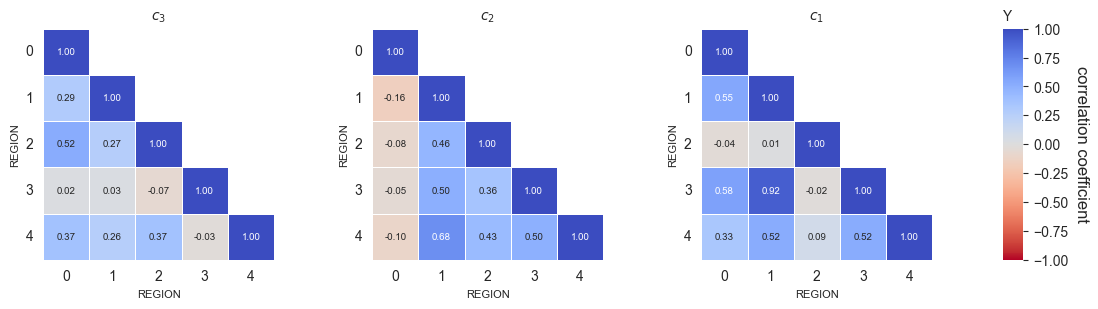

In [40]:
import seaborn as sb

Centroide = np.array(['X', 'Y'])

# Change the Background Color of Seaborn Plots
sb.set_style("white")

# Cycle to iterate in measurements labels
for measure in Centroide:
    c = 0
    dfA = pd.DataFrame()
    dfB = pd.DataFrame()
    dfC = pd.DataFrame()
    
    # Cycle to iterate in cameras
    for camera in cameras:
        if camera == 'A':
            c = 0
            df = dataframe_a
        elif camera == 'B':
            c = 1
            df = dataframe_b
        else:
            c = 2
            df = dataframe_c
        
        # Get CLUSTER and MEASURE columns only
        feature = df[['REGION', str(measure)]]
        
        # Init vars
        columns = {}
        lenFeatures = np.array([0])
        
        # Cycle to iterate in cluster types
        for cluster in clusters:
            col = feature.loc[feature.REGION == cluster, [str(measure)]]
            columns[str(cluster)] = col[str(measure)].to_numpy()
            #print('df: '+ str(len(df)) + " measure: " + str(len(feature)) + " cluster: " + str(len(columns[str(cluster)])))
            lenFeatures = np.concatenate((lenFeatures, [len(columns[str(cluster)])]))
        
        # get max value from lenFeatures array
        nMax = lenFeatures.max()
        
        newColumns = {}
        for key, value in columns.items():
            newfeature = value
            #print(key, value)
                
            if (nMax - len(value)) > 0 :
                zeros = np.zeros(nMax - len(value))           # define constant with ceros
                newfeature = np.concatenate((value,zeros))
            newColumns[str(key)] = newfeature
            
        #print(newColumns)
        
        # Create the dataframe
        df2 = pd.DataFrame(newColumns)
        #ax = sns.heatmap(df2.corr(method='pearson'), annot=True, vmin=-1, vmax=1, center=0,cmap=plt.cm.get_cmap('coolwarm').reversed(), square=True, linewidth=.5, fmt=".3f")
      
        if camera == 'A':
            dfA = df2
        elif camera == 'B':
            dfB = df2
        else:
            dfC = df2
            
    fig,(ax1,ax2,ax3, axcb) = plt.subplots(nrows=1, ncols=4, gridspec_kw={'width_ratios':[1,1,1,0.07]}, figsize=(13,3))
    ax1.get_shared_y_axes().join(ax2,ax3)
    
    # Calculate correlation between each pair of variable
    corr_matrix = dfC.corr(method='pearson')
    #corr_matrix[np.abs(corr_matrix)<.2] = 0.0001
    dnc3 = corr_matrix
    mask = np.triu(corr_matrix)
    np.fill_diagonal(mask, False)
    g1 = sb.heatmap(corr_matrix, mask=mask, annot = True, vmin=-1, vmax=1, center=0, cmap=plt.cm.get_cmap('coolwarm').reversed(), square=True, linewidth=.5, fmt=".2f", cbar=False, ax=ax1, annot_kws={"fontsize":7})
    g1.set_title(r'$c_3$', fontsize = 10)
    g1.set_xlabel('REGION', fontsize = 8)
    g1.set_ylabel('REGION', fontsize = 8)
    #g1.yaxis.tick_right()
    #g1.set_ylabel(measure, fontsize = 10)
    g1.tick_params(axis='y', labelrotation=0)
                    
    # Calculate correlation between each pair of variable
    corr_matrix = dfB.corr(method='pearson')
    #corr_matrix[np.abs(corr_matrix)<.2] = 0.0001
    dnc2 = corr_matrix
    mask = np.triu(corr_matrix)
    np.fill_diagonal(mask, False)
    g2 = sb.heatmap(corr_matrix, mask=mask, annot = True, vmin=-1, vmax=1, center=0, cmap=plt.cm.get_cmap('coolwarm').reversed(), square=True, linewidth=.5, fmt=".2f",cbar=False, ax=ax2, annot_kws={"fontsize":7})
    g2.set_title(r'$c_2$', fontsize = 10)
    g2.set_xlabel('REGION', fontsize = 8)
    g2.set_ylabel('REGION', fontsize = 8)
    #g2.set_ylabel('')
    #g2.set_yticks([])
    #g2.yaxis.tick_right()
    g2.tick_params(axis='y', labelrotation=0)
    
    # Calculate correlation between each pair of variable
    corr_matrix = dfA.corr(method='pearson')
    #corr_matrix[np.abs(corr_matrix)<.2] = 0.0001
    dnc1 = corr_matrix
    mask = np.triu(corr_matrix)
    np.fill_diagonal(mask, False)
    g3 = sb.heatmap(corr_matrix, mask=mask, annot = True, vmin=-1, vmax=1, center=0, cmap=plt.cm.get_cmap('coolwarm').reversed(), square=True, linewidth=.5, fmt=".2f",ax=ax3, annot_kws={"fontsize":7}, cbar_ax=axcb)
    g3.set_title(r'$c_1$', fontsize = 10)
    g3.set_xlabel('REGION', fontsize = 8)
    g3.set_ylabel('REGION', fontsize = 8)
    #g3.set_ylabel('')
    #g3.set_yticks([])
    #g3.yaxis.tick_right()
    g3.tick_params(axis='y', labelrotation=0)
    axcb.set_ylabel('correlation coefficient', rotation=-90, va="bottom")
    plt.title(measure, loc='left', fontsize = 10)
    plt.show()


    

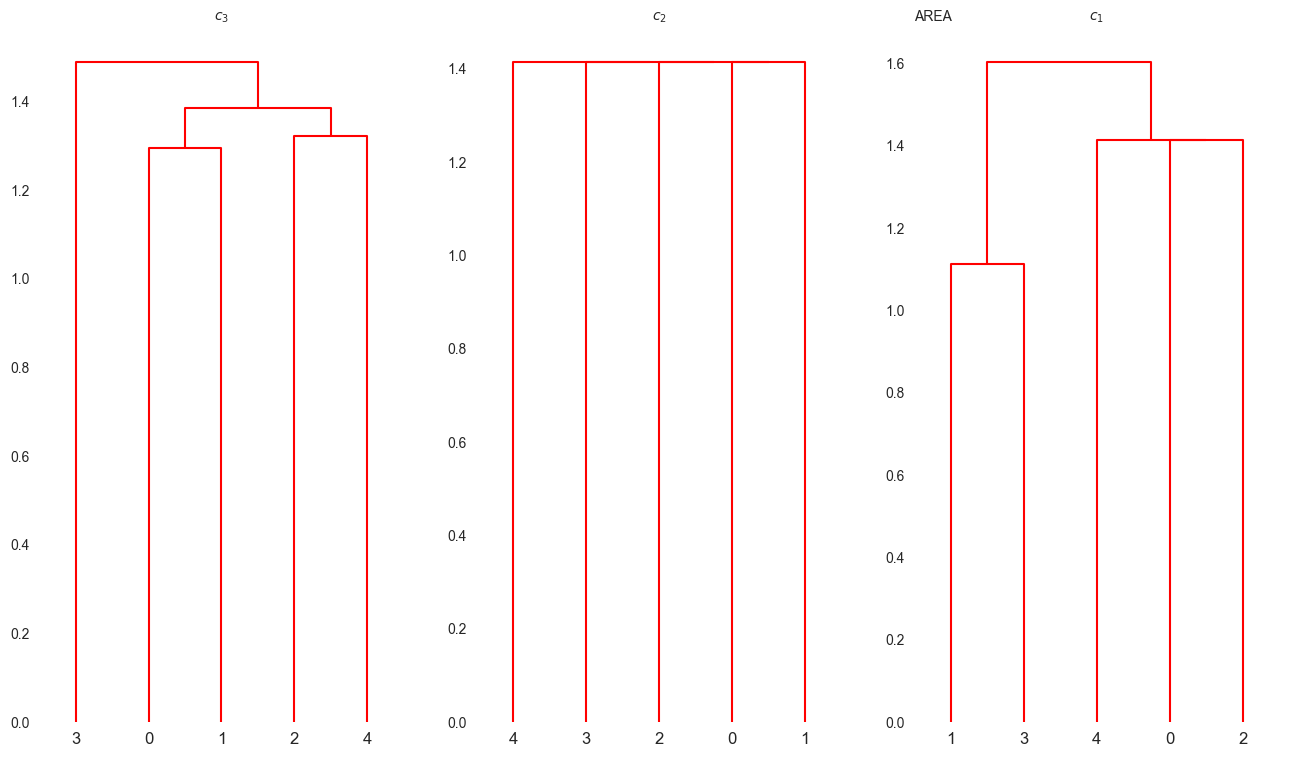

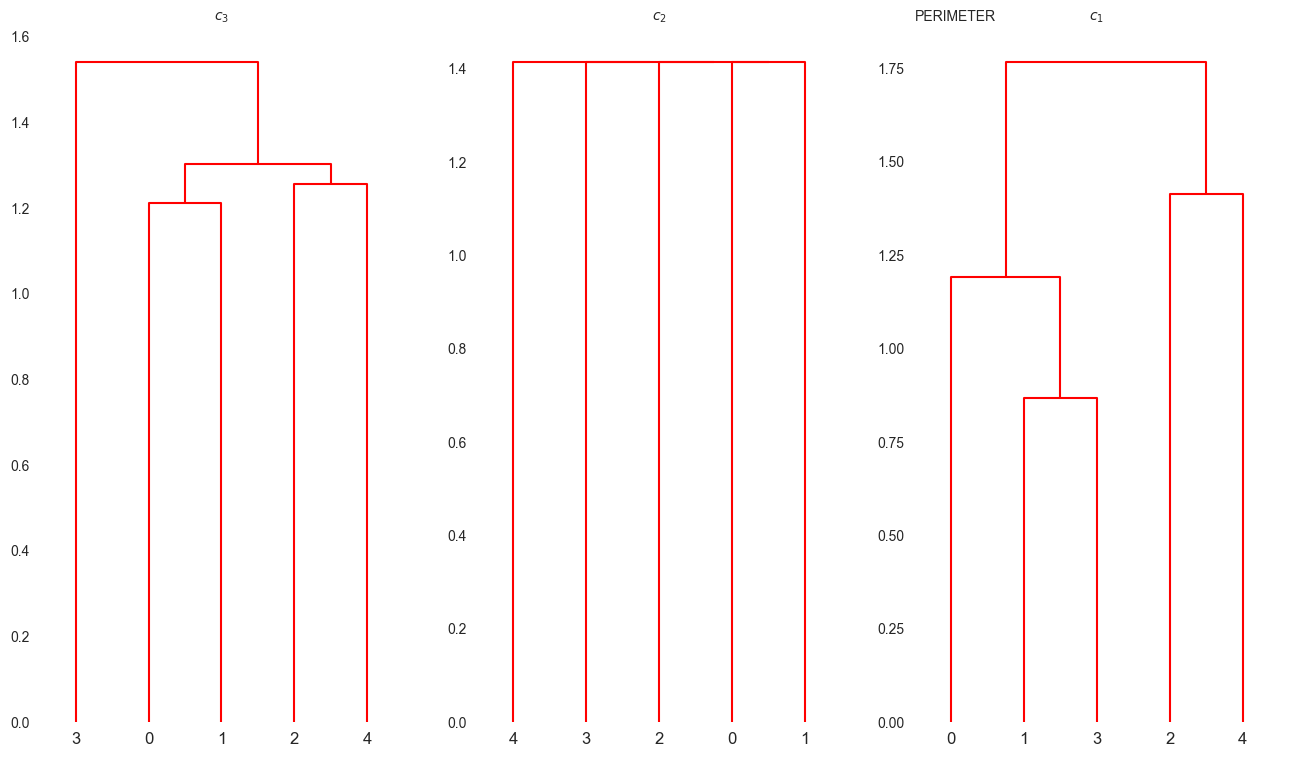

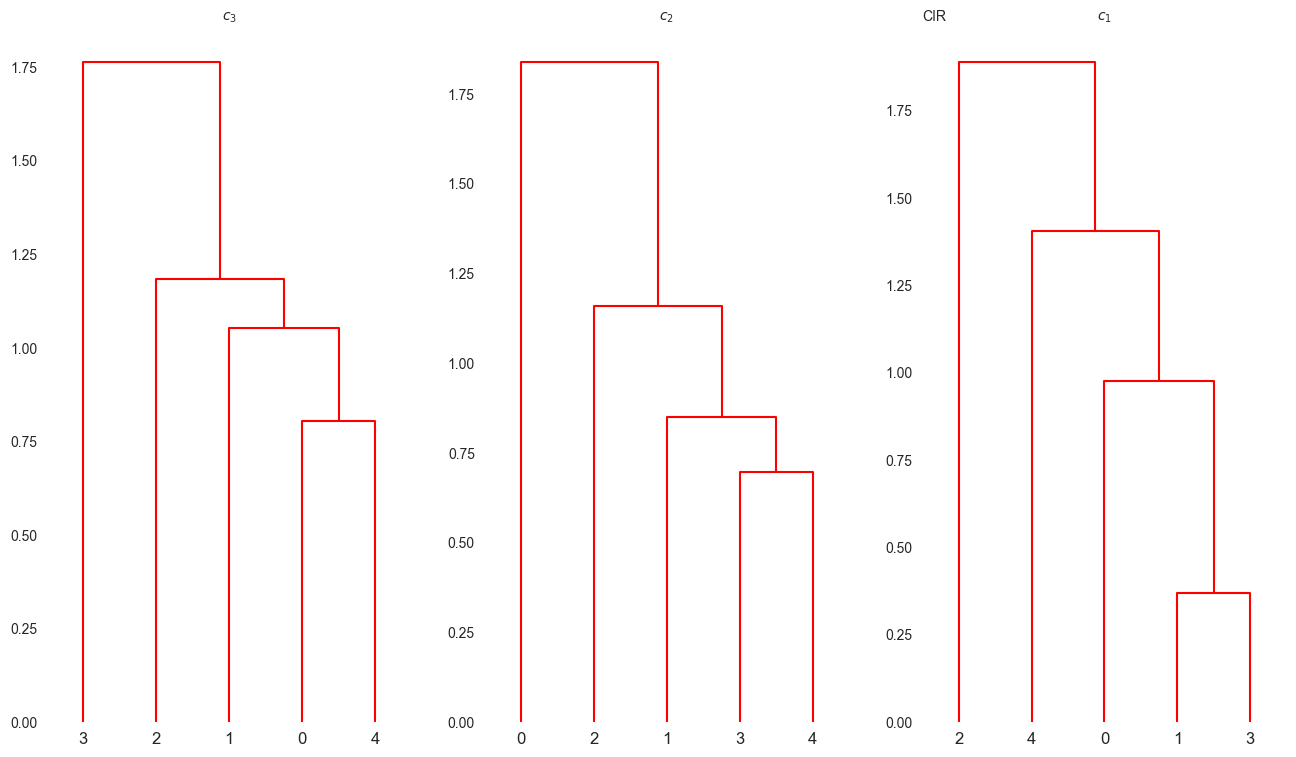

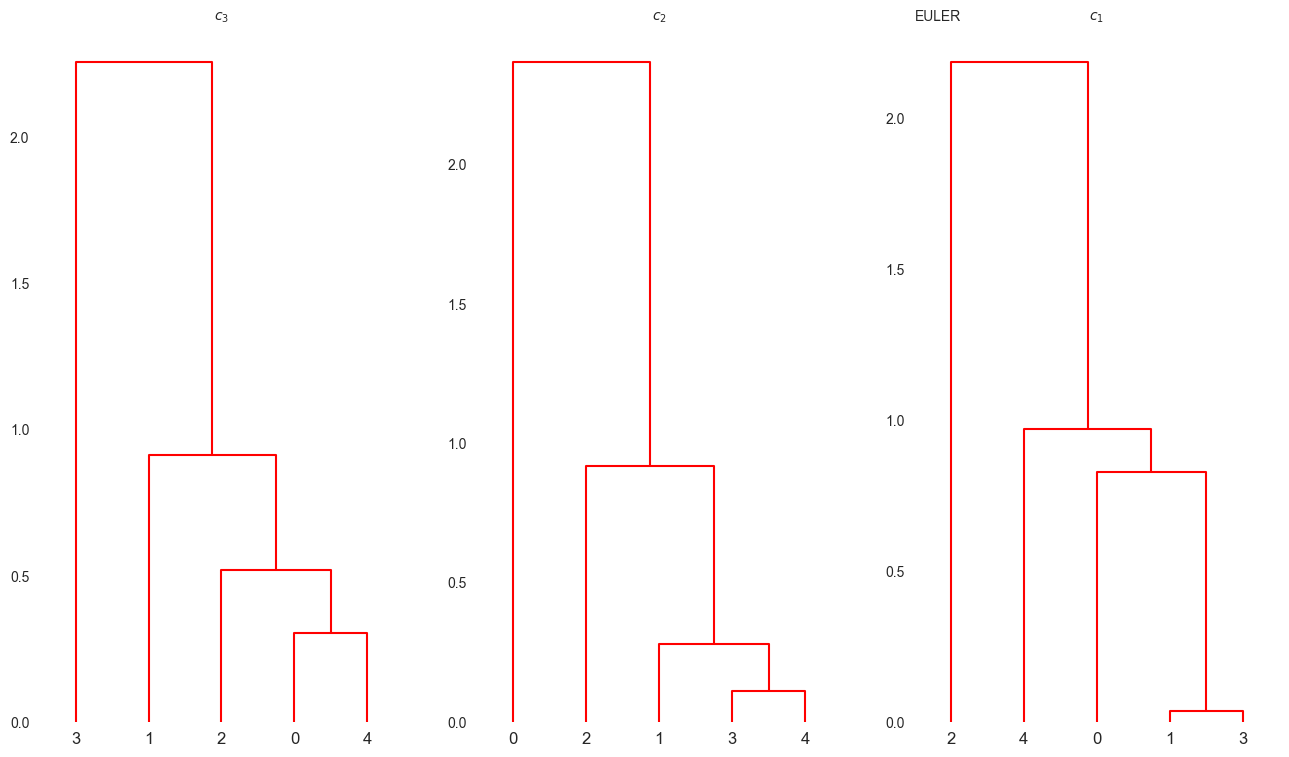

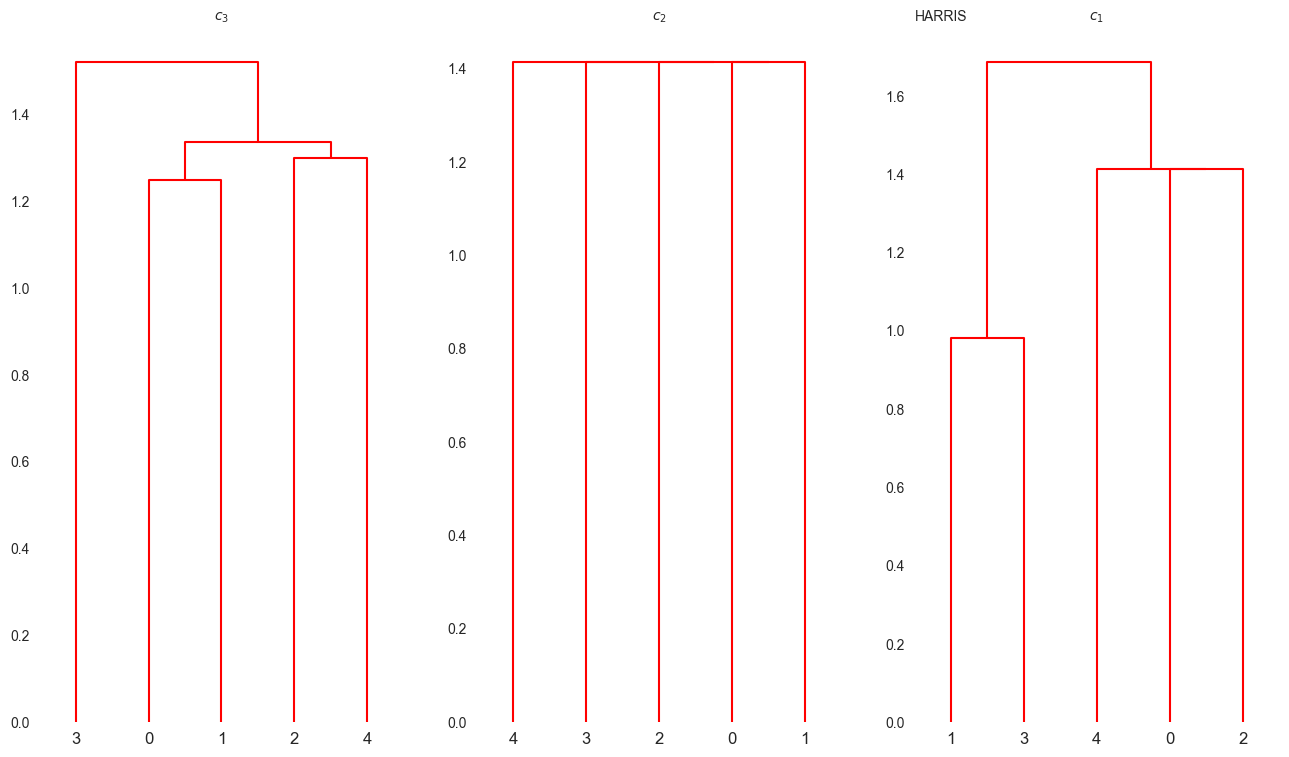

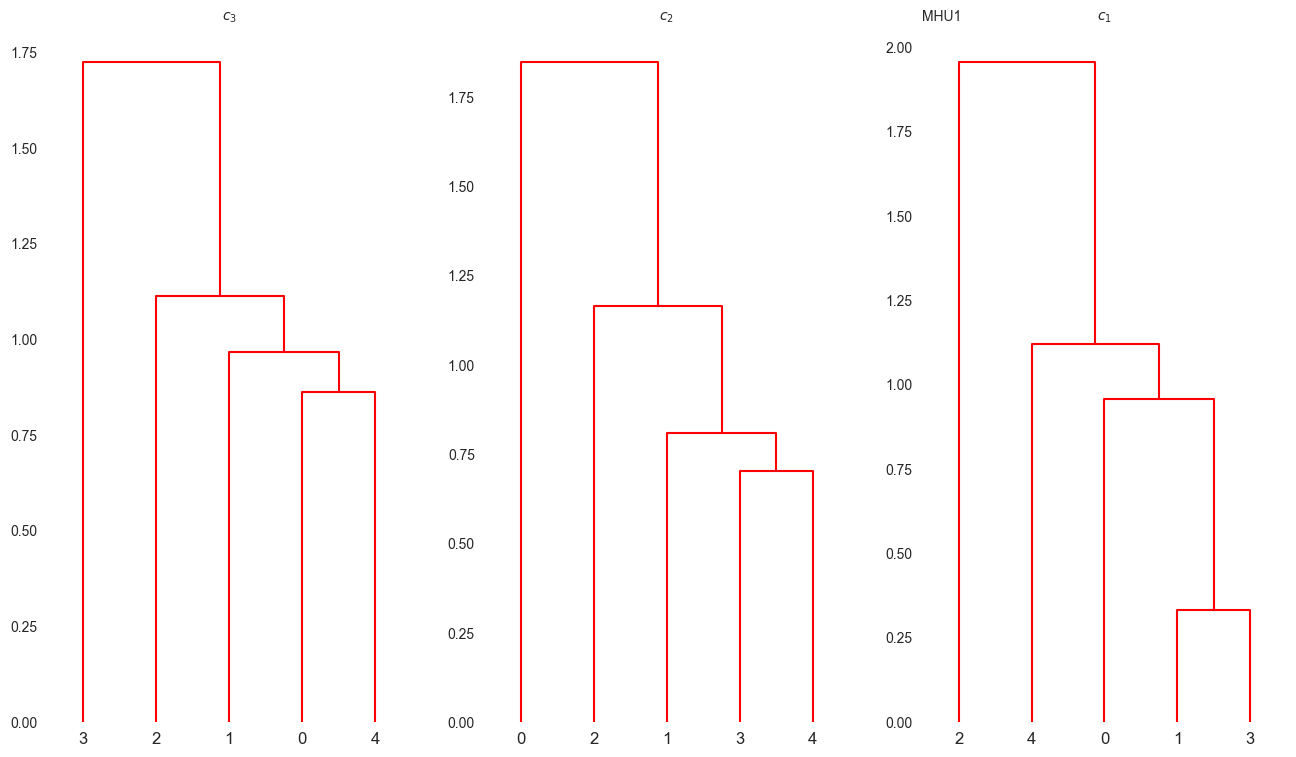

In [41]:
import seaborn as sb

# Change the Background Color of Seaborn Plots
sb.set_style("white")

# Cycle to iterate in measurements labels
for measure in measurements:
    c = 0
    dfA = pd.DataFrame()
    dfB = pd.DataFrame()
    dfC = pd.DataFrame()
    
    # Cycle to iterate in cameras
    for camera in cameras:
        if camera == 'A':
            c = 0
            df = dataframe_a
        elif camera == 'B':
            c = 1
            df = dataframe_b
        else:
            c = 2
            df = dataframe_c
        
        # Get CLUSTER and MEASURE columns only
        feature = df[['REGION', str(measure)]]
        
        # Init vars
        columns = {}
        lenFeatures = np.array([0])
        
        # Cycle to iterate in cluster types
        for cluster in clusters:
            col = feature.loc[feature.REGION == cluster, [str(measure)]]
            columns[str(cluster)] = col[str(measure)].to_numpy()
            #print('df: '+ str(len(df)) + " measure: " + str(len(feature)) + " cluster: " + str(len(columns[str(cluster)])))
            lenFeatures = np.concatenate((lenFeatures, [len(columns[str(cluster)])]))
        
        # get max value from lenFeatures array
        nMax = lenFeatures.max()
        
        newColumns = {}
        for key, value in columns.items():
            newfeature = value
            #print(key, value)
                
            if (nMax - len(value)) > 0 :
                zeros = np.zeros(nMax - len(value))           # define constant with ceros
                newfeature = np.concatenate((value,zeros))
            newColumns[str(key)] = newfeature
            
        #print(newColumns)
        
        # Create the dataframe
        df2 = pd.DataFrame(newColumns)
        #ax = sns.heatmap(df2.corr(method='pearson'), annot=True, vmin=-1, vmax=1, center=0,cmap=plt.cm.get_cmap('coolwarm').reversed(), square=True, linewidth=.5, fmt=".3f")
      
        if camera == 'A':
            dfA = df2
        elif camera == 'B':
            dfB = df2
        else:
            dfC = df2
            
    #fig,(ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, gridspec_kw={'width_ratios':[1,1,1]}, figsize=(13,2))
    #ax1.get_shared_y_axes().join(ax2,ax3)
    
    subject = [0, 1, 2, 3, 4]
    
    # Calculate correlation between each pair of variable
    corr_matrix = dfC.corr(method='pearson')
    #corr_matrix[np.abs(corr_matrix)<.2] = 0.0001
    dnc3 = corr_matrix
    
    ax1=plt.subplot(1, 3, 1)
    # DENDROGRAM
    # Calculate the distance between each sample
    Z = hierarchy.linkage(dnc3, method='ward', metric='euclidean')
    # Set the colour of the cluster here:
    hierarchy.set_link_color_palette(['red', 'blue', 'green', 'darkorange', 'gold', 'lightcoral', 'orangered', 'brown'])
    # Make the dendrogram and give the colour above threshold
    g1 = hierarchy.dendrogram(Z,labels=subject, above_threshold_color='r', orientation='top')
    
    ax1.set_title(r'$c_3$', fontsize = 10)
    #g1.set_xlabel('CLUSTER', fontsize = 8)
    #g1.set_ylabel('CLUSTER', fontsize = 8)
    #g1.tick_params(axis='y', labelrotation=0)
                    
    # Calculate correlation between each pair of variable
    corr_matrix = dfB.corr(method='pearson')
    corr_matrix[np.abs(corr_matrix)<.2] = 0.0001
    dnc2 = corr_matrix
    
    
    ax2=plt.subplot(1, 3, 2)
    # DENDROGRAM
    # Calculate the distance between each sample
    Z = hierarchy.linkage(dnc2, method='ward', metric='euclidean')
    # Set the colour of the cluster here:
    hierarchy.set_link_color_palette(['red', 'blue', 'green', 'darkorange', 'gold', 'lightcoral', 'orangered', 'brown'])
    # Make the dendrogram and give the colour above threshold
    g2 = hierarchy.dendrogram(Z,labels=subject, above_threshold_color='r', orientation='top')
    ax2.set_title(r'$c_2$', fontsize = 10)
    #g2.set_xlabel('CLUSTER', fontsize = 8)
    #g2.set_ylabel('CLUSTER', fontsize = 8)
    #g2.tick_params(axis='y', labelrotation=0)
    
    # Calculate correlation between each pair of variable
    corr_matrix = dfA.corr(method='pearson')
    corr_matrix[np.abs(corr_matrix)<.2] = 0.0001
    dnc1 = corr_matrix
    
    
    ax3=plt.subplot(1, 3, 3)
    # DENDROGRAM
    # Calculate the distance between each sample
    Z = hierarchy.linkage(dnc1, method='ward', metric='euclidean')
    # Set the colour of the cluster here:
    hierarchy.set_link_color_palette(['red', 'blue', 'green', 'darkorange', 'gold', 'lightcoral', 'orangered', 'brown'])
    # Make the dendrogram and give the colour above threshold
    g3 = hierarchy.dendrogram(Z,labels=subject, above_threshold_color='r', orientation='top')
    
    ax3.set_title(r'$c_1$', fontsize = 10)
    #g3.set_xlabel('CLUSTER', fontsize = 8)
    #g3.set_ylabel('CLUSTER', fontsize = 8)
    #g3.tick_params(axis='y', labelrotation=0)
    #axcb.set_ylabel('correlation coefficient', rotation=-90, va="bottom")
    plt.title(measure, loc='left', fontsize = 10)
    
    no_spine = {'left': True, 'bottom': True, 'right': True, 'top': True}
    sb.despine(**no_spine);
    plt.show()


    

# Correlation between the variable of each Camera1, Camera2, Camera3 and cluster

In [42]:
# Define cluster types and measurements labels

clusters = np.array([0,1,2,3,4])
#clusters = np.array([0])
print(clusters)

#measurements = np.array(['AREA','PERIMETER','X','Y','STDX','STDY','CIR','EULER','HARRIS','MHU1','MHU2','MHU3','MHU4'])
measurements = np.array(['AREA', 'PERIMETER', 'CIR','EULER','HARRIS','MHU1'])
print(measurements)


[0 1 2 3 4]
['AREA' 'PERIMETER' 'CIR' 'EULER' 'HARRIS' 'MHU1']


/var/folders/m2/fwpdyffx07vfrssrjrwss6jc0000gn/T/ipykernel_9293/3512838037.py:83: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  ax = sb.heatmap(corr_matrix, mask=mask, annot=True, vmin=-1, vmax=1, center=0,cmap=plt.cm.get_cmap('coolwarm').reversed(), square=True, linewidth=.5, fmt=".2f")


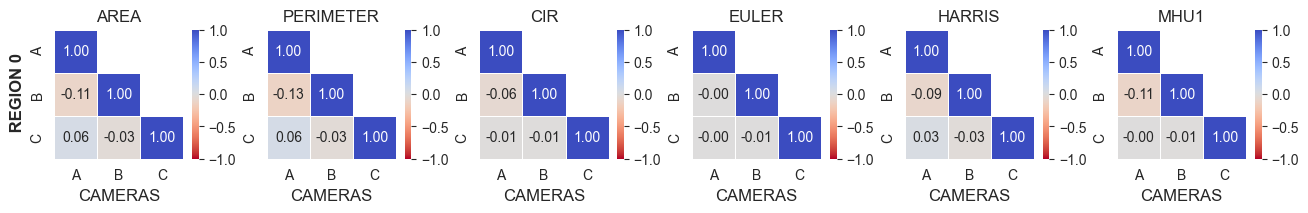

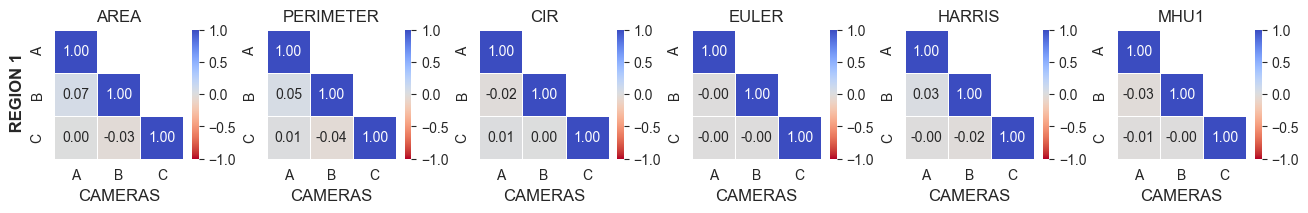

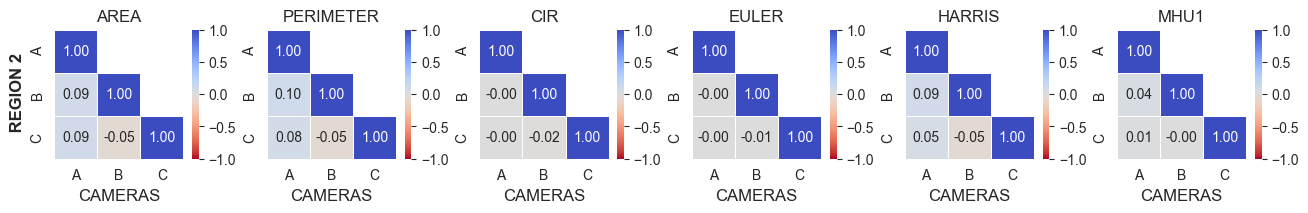

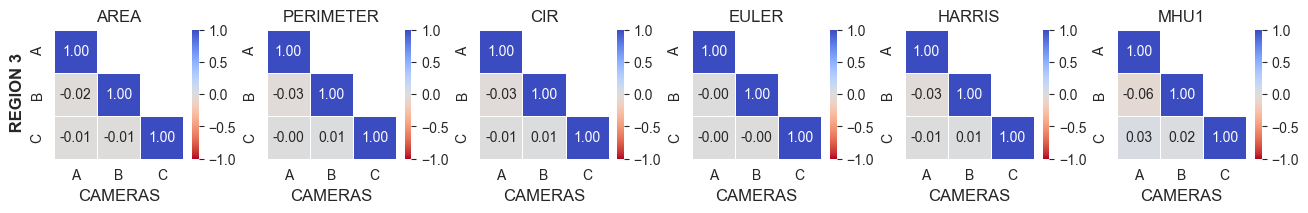

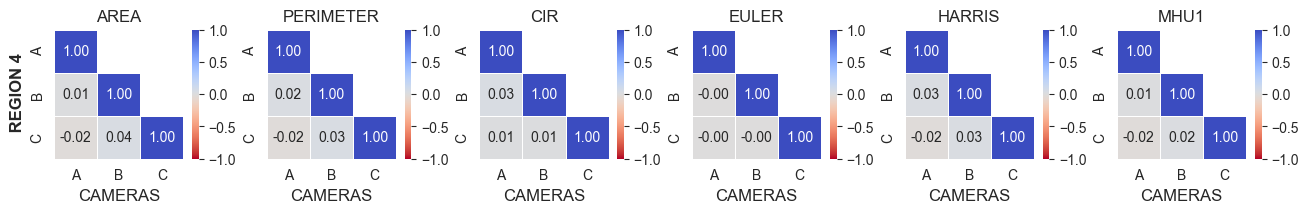

In [43]:
import seaborn as sb

# Change the Background Color of Seaborn Plots
sb.set_style("white")

# Cycle to iterate in cluster types
for cluster in clusters:
    dfA = dataframe_a[dataframe_a['REGION'] == cluster] # 0,1,2,3,4
    dfB = dataframe_b[dataframe_b['REGION'] == cluster] # 0,1,2,3,4
    dfC = dataframe_c[dataframe_c['REGION'] == cluster] # 0,1,2,3,4
    
    i = -1
    fig = plt.figure()
    #print(" Cluster: " + str(cluster))
    
    # Cycle to iterate in measurements labels
    for measure in measurements:
        featureA = dfA[measure].to_numpy()
        featureB = dfB[measure].to_numpy()
        featureC = dfC[measure].to_numpy()
        # set into array the length of featureA, featureB, featureC
        lenFeatures = np.array([len(featureA), len(featureB), len(featureC)])
        # get max value from lenFeatures array
        nMax = lenFeatures.max()
        #print(lenFeatures, " max=" + str(nMax), sep="---")
        # fill with zeros the array of each feature A,B,C
        newfeatureA = featureA
        newfeatureB = featureB
        newfeatureC = featureC
        
        if (nMax - len(featureA)) > 0 :
            #zeros = np.zeros(nMax - len(featureA))           # define constant with ceros
            zeros = np.empty(nMax - len(featureA))
            zeros[:] = np.nan
            newfeatureA = np.concatenate((featureA,zeros))
        if (nMax - len(featureB)) > 0 :
            #zeros = np.zeros(nMax - len(featureB))           # define constant with ceros
            zeros = np.empty(nMax - len(featureB))
            zeros[:] = np.nan
            newfeatureB = np.concatenate((featureB,zeros))
        if (nMax - len(featureC)) > 0 :
            #zeros = np.zeros(nMax - len(featureC))           # define constant with ceros
            zeros = np.empty(nMax - len(featureC))
            zeros[:] = np.nan
            newfeatureC = np.concatenate((featureC,zeros))
        
        # build matriz 
        matrizFeatures = np.array([newfeatureA,newfeatureB,newfeatureC])
        matrizFeatures.shape
        R1 = np.corrcoef(matrizFeatures)
        #print("---", measure + " Cluster " + str(cluster), "---")
        #print(R1, end='\n\n')
        data = {
          "A": newfeatureA,
          "B": newfeatureB,
          "C": newfeatureC  
        }
        # Create the dataframe
        df = pd.DataFrame(data)
        i=(i+1)
        
        axis = plt.subplot2grid((10, 6), (cluster, i), rowspan=2, colspan=1)
        #fig = plt.figure()
        
        # Calculate correlation between each pair of variable
        corr_matrix = df.corr(method='pearson')
        
        # Creating a mask that makes all values below a certain value zero.
        #corr_matrix[np.abs(corr_matrix)<.2] = 0.0001
        
        # Getting the Upper Triangle of the co-relation matrix
        mask = np.triu(corr_matrix)
        
        # Getting the Lower Triangle of the co-relation matrix
        #mask = np.tril(corr_matrix)
        
        # Show diagonal values
        np.fill_diagonal(mask, False)
        
        # color map
        #cmap = sb.diverging_palette(0, 230, 90, 60, as_cmap=True)
        
        ax = sb.heatmap(corr_matrix, mask=mask, annot=True, vmin=-1, vmax=1, center=0,cmap=plt.cm.get_cmap('coolwarm').reversed(), square=True, linewidth=.5, fmt=".2f")
        #ax = sb.heatmap(corr_matrix, mask=mask, annot=True, vmin=-1, vmax=1, center=0,cmap=cmap, square=True, linewidth=.5, fmt=".2f")
        
        #df.corr(method='pearson').style.format("{:.3}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)
        #plt.title( measure + " Cluster " + str(cluster), fontsize = 15) # title with fontsize 20
        plt.title( measure, fontsize = 12) # title with fontsize 12
        plt.xlabel('CAMERAS', fontsize = 12) # x-axis label with fontsize 12
        #plt.ylabel('Monthes', fontsize = 15) # y-axis label with fontsize 15
        if(i==0):
            plt.ylabel(" REGION " + str(cluster), fontsize = 12, weight='bold') # y-axis label with fontsize 12
    plt.show()


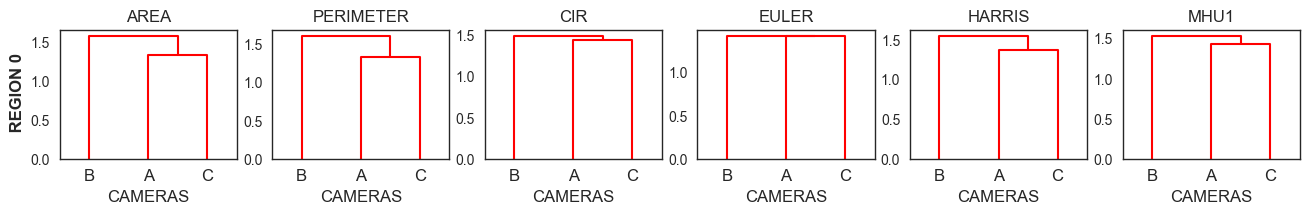

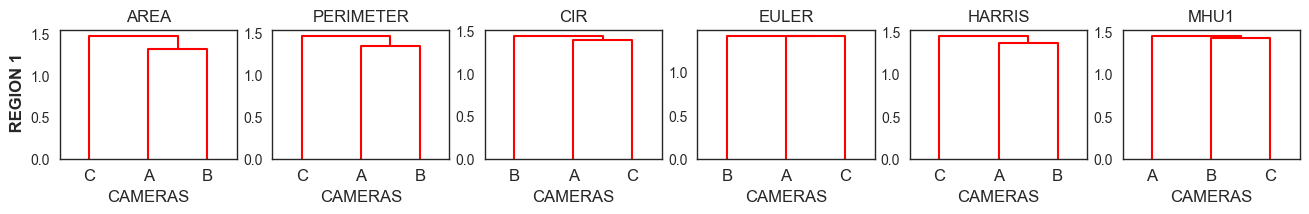

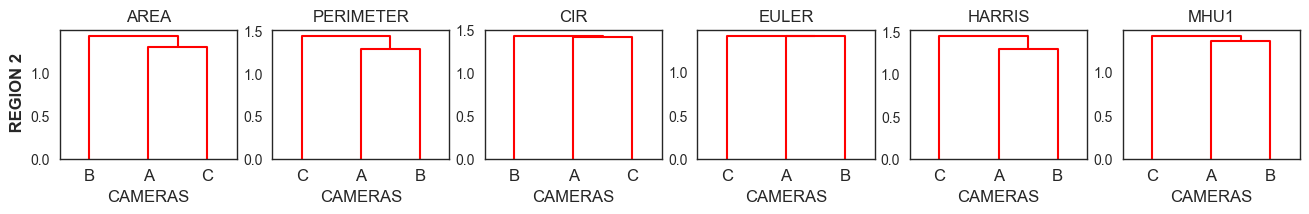

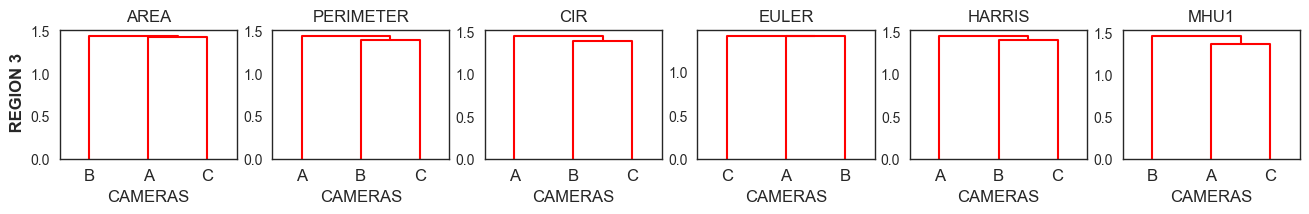

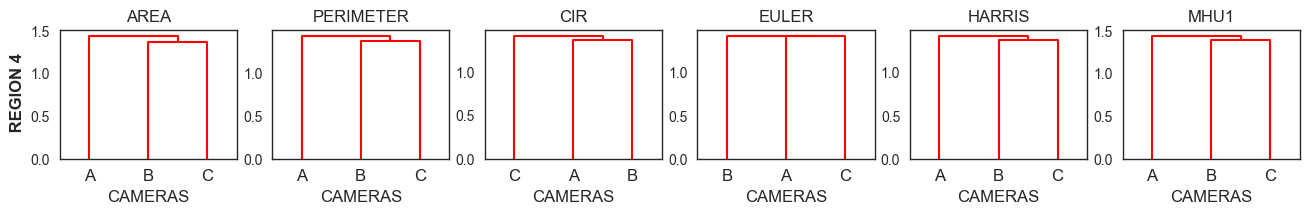

In [44]:
import seaborn as sb

# Change the Background Color of Seaborn Plots
sb.set_style("white")
subject = np.array(['A', 'B', 'C'])
# Cycle to iterate in cluster types
for cluster in clusters:
    dfA = dataframe_a[dataframe_a['REGION'] == cluster] # 0,1,2,3,4
    dfB = dataframe_b[dataframe_b['REGION'] == cluster] # 0,1,2,3,4
    dfC = dataframe_c[dataframe_c['REGION'] == cluster] # 0,1,2,3,4
    
    i = -1
    fig = plt.figure()
    #print(" Cluster: " + str(cluster))
    
    # Cycle to iterate in measurements labels
    for measure in measurements:
        featureA = dfA[measure].to_numpy()
        featureB = dfB[measure].to_numpy()
        featureC = dfC[measure].to_numpy()
        # set into array the length of featureA, featureB, featureC
        lenFeatures = np.array([len(featureA), len(featureB), len(featureC)])
        # get max value from lenFeatures array
        nMax = lenFeatures.max()
        #print(lenFeatures, " max=" + str(nMax), sep="---")
        # fill with zeros the array of each feature A,B,C
        newfeatureA = featureA
        newfeatureB = featureB
        newfeatureC = featureC
        
        if (nMax - len(featureA)) > 0 :
            #zeros = np.zeros(nMax - len(featureA))           # define constant with ceros
            zeros = np.empty(nMax - len(featureA))
            zeros[:] = np.nan
            newfeatureA = np.concatenate((featureA,zeros))
        if (nMax - len(featureB)) > 0 :
            #zeros = np.zeros(nMax - len(featureB))           # define constant with ceros
            zeros = np.empty(nMax - len(featureB))
            zeros[:] = np.nan
            newfeatureB = np.concatenate((featureB,zeros))
        if (nMax - len(featureC)) > 0 :
            #zeros = np.zeros(nMax - len(featureC))           # define constant with ceros
            zeros = np.empty(nMax - len(featureC))
            zeros[:] = np.nan
            newfeatureC = np.concatenate((featureC,zeros))
        
        # build matriz 
        matrizFeatures = np.array([newfeatureA,newfeatureB,newfeatureC])
        matrizFeatures.shape
        R1 = np.corrcoef(matrizFeatures)
        #print("---", measure + " Cluster " + str(cluster), "---")
        #print(R1, end='\n\n')
        data = {
          "A": newfeatureA,
          "B": newfeatureB,
          "C": newfeatureC  
        }
        # Create the dataframe
        df = pd.DataFrame(data)
        i=(i+1)
        
        axis = plt.subplot2grid((10, 6), (cluster, i), rowspan=2, colspan=1)
        #fig = plt.figure()
        
        # Calculate correlation between each pair of variable
        corr_matrix = df.corr(method='pearson')
        
        # DENDROGRAM
        # Calculate the distance between each sample
        Z = hierarchy.linkage(corr_matrix, method='ward', metric='euclidean')
        # Set the colour of the cluster here:
        hierarchy.set_link_color_palette(['red', 'blue', 'green', 'darkorange', 'gold', 'lightcoral', 'orangered', 'brown'])
        # Make the dendrogram and give the colour above threshold
        g1 = hierarchy.dendrogram(Z,labels=subject, above_threshold_color='r', orientation='top')

        ax1.set_title('C3', fontsize = 10)

        
        plt.title( measure, fontsize = 12) # title with fontsize 12
        plt.xlabel('CAMERAS', fontsize = 12) # x-axis label with fontsize 12
        
        if(i==0):
            plt.ylabel(" REGION " + str(cluster), fontsize = 12, weight='bold') # y-axis label with fontsize 12
    plt.show()


In [45]:
corr_matrix

,A,B,C
A,1.000000,0.007925,-0.019720
B,0.007925,1.000000,0.022067
C,-0.019720,0.022067,1.000000


/var/folders/m2/fwpdyffx07vfrssrjrwss6jc0000gn/T/ipykernel_9293/1407705535.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  sb.clustermap(corr_matrix, col_cluster=False,figsize=(3, 3), annot=True, vmin=-1, vmax=1, center=0,cmap=plt.cm.get_cmap('coolwarm').reversed(), linewidth=.5, fmt=".2f")


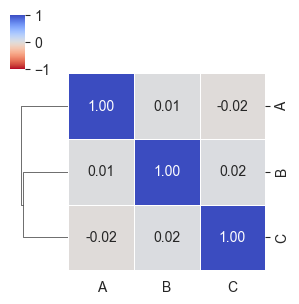

In [46]:
sb.clustermap(corr_matrix, col_cluster=False,figsize=(3, 3), annot=True, vmin=-1, vmax=1, center=0,cmap=plt.cm.get_cmap('coolwarm').reversed(), linewidth=.5, fmt=".2f")

In [47]:
#from scipy.cluster import hierarchy

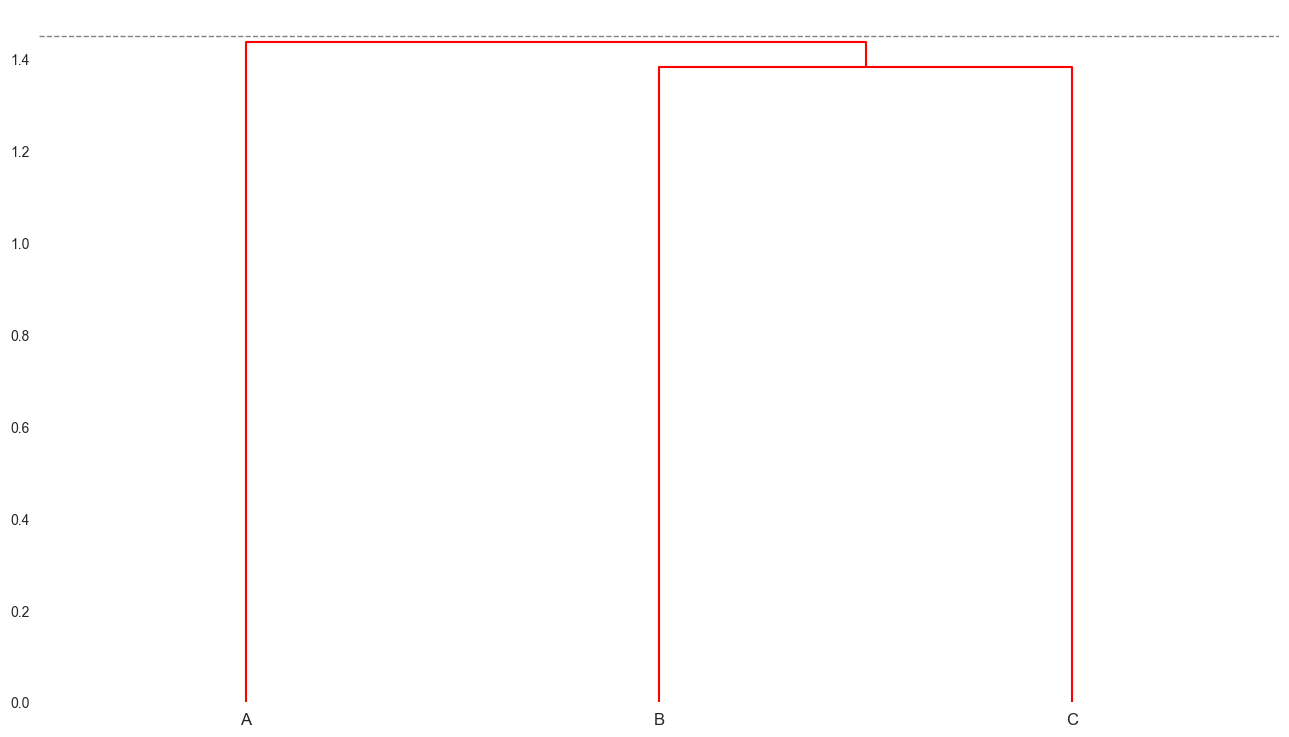

In [48]:
subject = ['A','B','C']

# DENDROGRAM
plt.figure()

# Calculate the distance between each sample
clusters = hierarchy.linkage(corr_matrix, method='ward', metric='euclidean')

# Set the colour of the cluster here:
hierarchy.set_link_color_palette(['#b30000','#996600', '#b30086'])

# Make the dendrogram and give the colour above threshold
dn = hierarchy.dendrogram(clusters, labels=subject, above_threshold_color='r', orientation='top')

# Add horizontal line.
plt.axhline(y=1.45, c='grey', lw=1, linestyle='dashed')

no_spine = {'left': True, 'bottom': True, 'right': True, 'top': True}
sb.despine(**no_spine);


# Show the graph
plt.show()

In [49]:
dn

{'icoord': [[15.0, 15.0, 25.0, 25.0], [5.0, 5.0, 20.0, 20.0]],
 'dcoord': [[0.0, 1.383282186856993, 1.383282186856993, 0.0],
  [0.0, 1.4360348628097213, 1.4360348628097213, 1.383282186856993]],
 'ivl': ['A', 'B', 'C'],
 'leaves': [0, 1, 2],
 'color_list': ['r', 'r'],
 'leaves_color_list': ['r', 'r', 'r']}

In [50]:
print(dn['leaves'])

[0, 1, 2]


/Users/a80118/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


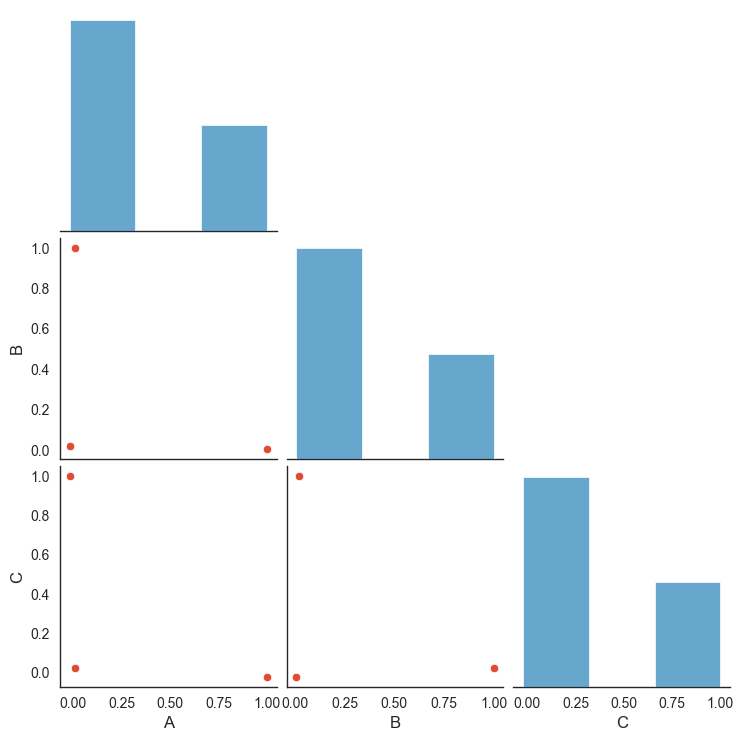

In [51]:
sb.pairplot(corr_matrix, corner = True)

# Graphs using networkx in python

In [52]:
import networkx as nx
import pylab

TypeError: '_AxesStack' object is not callable

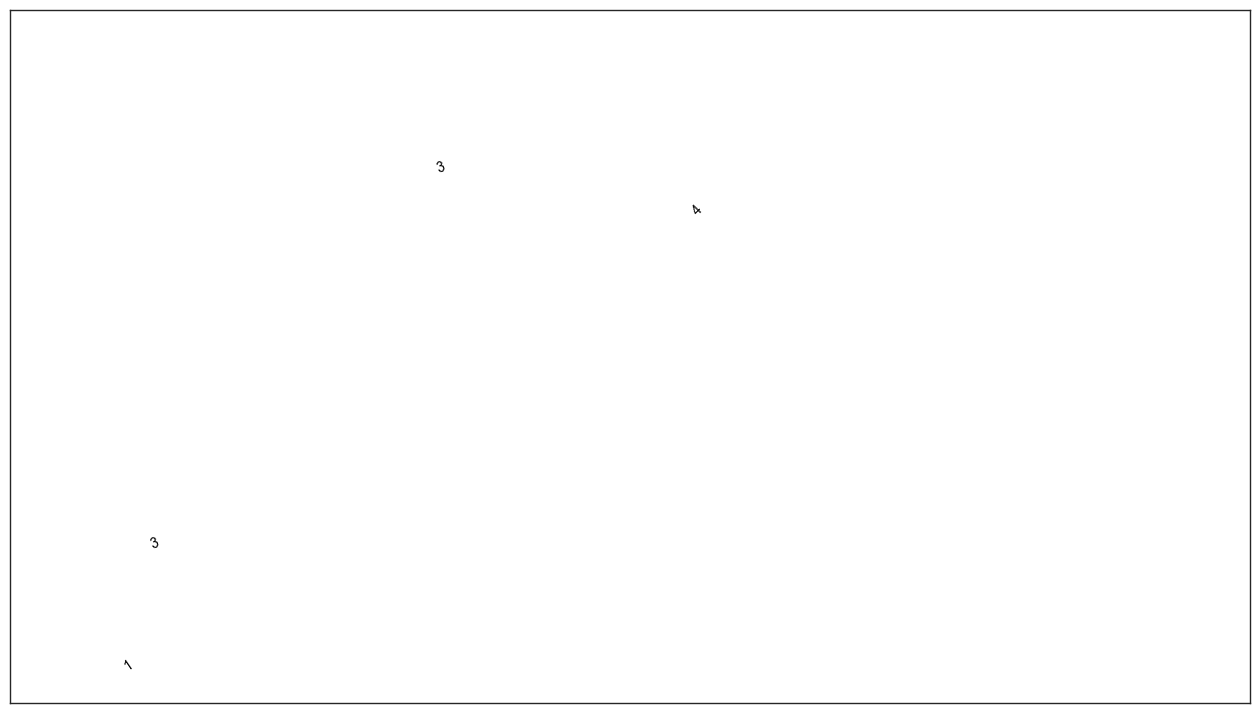

In [53]:
G = nx.DiGraph()

G.add_edges_from([('A', 'B'),('C','D'),('G','D')], weight=1)
G.add_edges_from([('D','A'),('D','E'),('B','D'),('D','E')], weight=2)
G.add_edges_from([('B','C'),('E','F')], weight=3)
G.add_edges_from([('C','F')], weight=4)

val_map = {
        'A': 1.0,
        'D': 0.5714285714285714,
        'H': 0.0
        }

values = [val_map.get(node, 0.45) for node in G.nodes()]
edge_labels=dict([((u,v,),d['weight'])
                 for u,v,d in G.edges(data=True)])
red_edges = [('C','D'),('D','A')]
edge_colors = ['black' if not edge in red_edges else 'red' for edge in G.edges()]

pos=nx.spring_layout(G)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
nx.draw(G,pos, node_color = values, node_size=1500,edge_color=edge_colors,edge_cmap=plt.cm.Reds)
pylab.show()

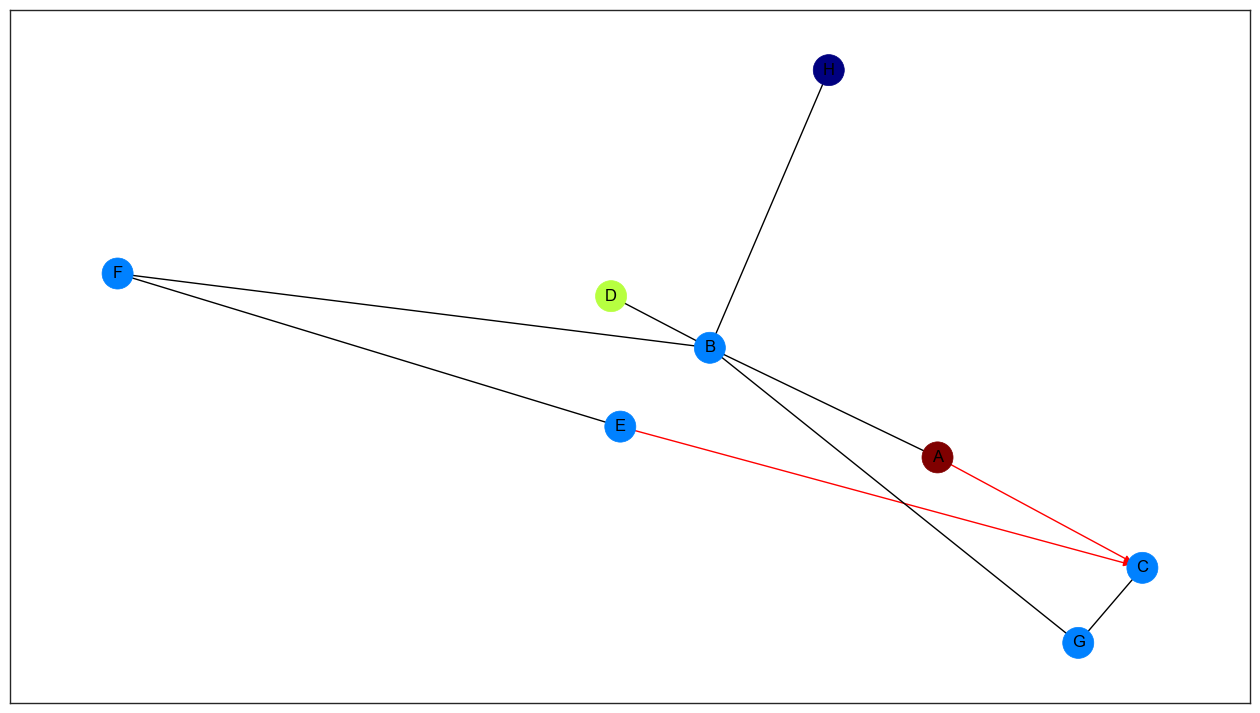

In [54]:
G = nx.DiGraph()
G.add_edges_from(
    [
        ('A', 'B'), 
         ('A', 'C'), 
         ('D', 'B'), 
         ('E', 'C'), 
         ('E', 'F'),
         ('B', 'H'), 
         ('B', 'G'), 
         ('B', 'F'), 
         ('C', 'G')
    ])

val_map = {'A': 1.0,
           'D': 0.5714285714285714,
           'H': 0.0}

values = [val_map.get(node, 0.25) for node in G.nodes()]

# Specify the edges you want here
red_edges = [('A', 'C'), ('E', 'C')]
edge_colours = ['black' if not edge in red_edges else 'red'
                for edge in G.edges()]
black_edges = [edge for edge in G.edges() if edge not in red_edges]

# Need to create a layout when doing
# separate calls to draw nodes and edges
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), 
                       node_color = values, node_size = 500)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edgelist=red_edges, edge_color='r', arrows=True)
nx.draw_networkx_edges(G, pos, edgelist=black_edges, arrows=False)
plt.show()

In [55]:
import networkx as nx
import random

    
def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):

    '''
    From Joel's answer at https://stackoverflow.com/a/29597209/2966723.  
    Licensed under Creative Commons Attribution-Share Alike 
    
    If the graph is a tree this will return the positions to plot this in a 
    hierarchical layout.
    
    G: the graph (must be a tree)
    
    root: the root node of current branch 
    - if the tree is directed and this is not given, 
      the root will be found and used
    - if the tree is directed and this is given, then 
      the positions will be just for the descendants of this node.
    - if the tree is undirected and not given, 
      then a random choice will be used.
    
    width: horizontal space allocated for this branch - avoids overlap with other branches
    
    vert_gap: gap between levels of hierarchy
    
    vert_loc: vertical location of root
    
    xcenter: horizontal location of root
    '''
    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        '''
        see hierarchy_pos docstring for most arguments

        pos: a dict saying where all nodes go if they have been assigned
        parent: parent of this branch. - only affects it if non-directed

        '''
    
        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            dx = width/len(children) 
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos

            
    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)

In [56]:
import networkx as nx
G=nx.Graph()
G.add_edges_from([(1,2), (1,3), (1,4), (2,5), (2,6), (2,7), (3,8), (3,9), (4,10),
                  (5,11), (5,12), (6,13)])
pos = hierarchy_pos(G,1)    
nx.draw(G, pos=pos, with_labels=True)
#plt.savefig('hierarchy.png')

TypeError: '_AxesStack' object is not callable

<Figure size 1600x900 with 0 Axes>

In [57]:
import networkx as nx

G=nx.DiGraph()
G.add_edges_from(dn)

pos = hierarchy_pos(G,1)    
p=nx.draw(G, pos=pos, with_labels=True)
#p.write_png('example.png')

NetworkXError: Edge tuple icoord must be a 2-tuple or 3-tuple.

In [58]:
clusters

array([[1.        , 2.        , 1.38328219, 2.        ],
       [0.        , 3.        , 1.43603486, 3.        ]])

In [59]:
dn

{'icoord': [[15.0, 15.0, 25.0, 25.0], [5.0, 5.0, 20.0, 20.0]],
 'dcoord': [[0.0, 1.383282186856993, 1.383282186856993, 0.0],
  [0.0, 1.4360348628097213, 1.4360348628097213, 1.383282186856993]],
 'ivl': ['A', 'B', 'C'],
 'leaves': [0, 1, 2],
 'color_list': ['r', 'r'],
 'leaves_color_list': ['r', 'r', 'r']}

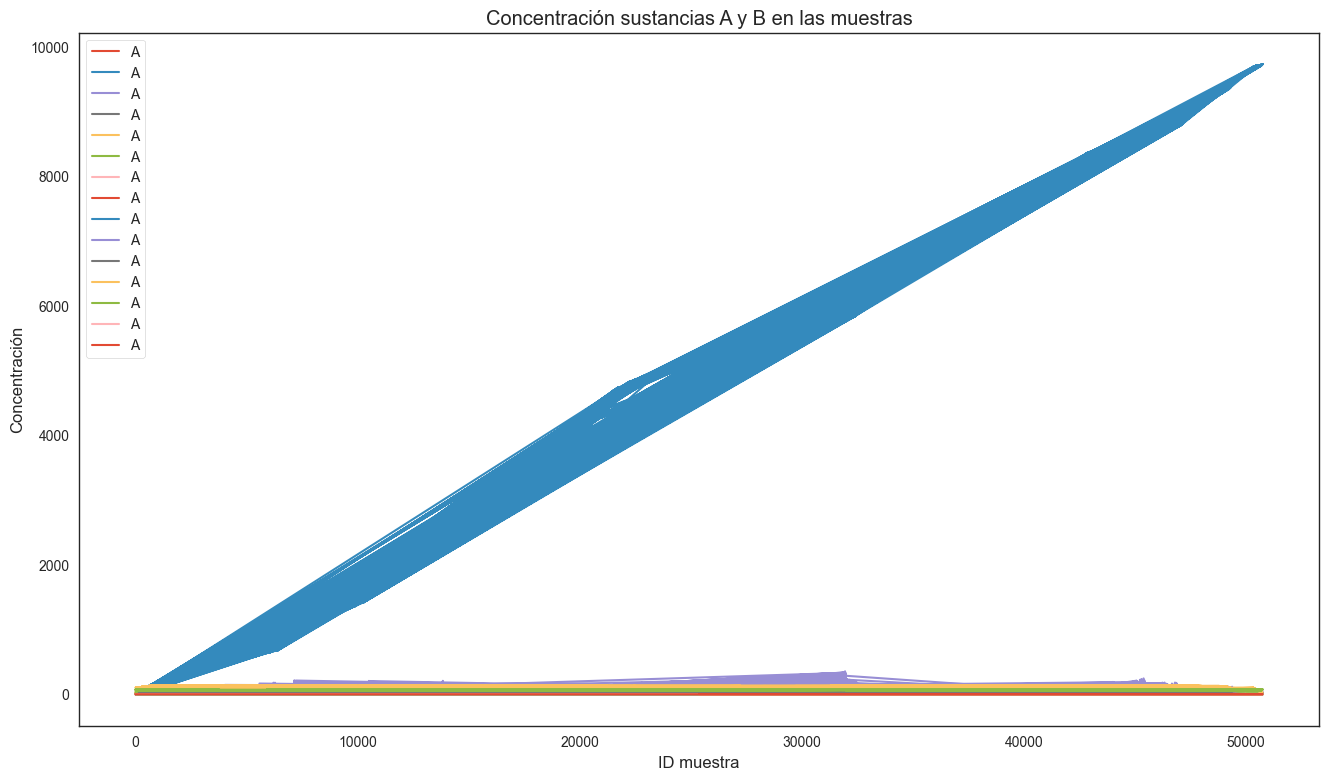

In [60]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(1, 1)
ax.plot(dataframe_a, label='A')
#ax.plot(c1, label='B')
ax.set_xlabel('ID muestra')
ax.set_ylabel('Concentración')
ax.set_title('Concentración sustancias A y B en las muestras')
ax.legend();

In [61]:
# Se eliminan filas que tengan valor NaN.
# df = df.dropna()
# df = df.reset_index(drop=True)

In [62]:
# Adjacency Matrix representation in Python


class Graph(object):

    # Initialize the matrix
    def __init__(self, size):
        self.adjMatrix = []
        for i in range(size):
            self.adjMatrix.append([0 for i in range(size)])
        self.size = size

    # Add edges
    def add_edge(self, v1, v2):
        if v1 == v2:
            print("Same vertex %d and %d" % (v1, v2))
        self.adjMatrix[v1][v2] = 1
        self.adjMatrix[v2][v1] = 1

    # Remove edges
    def remove_edge(self, v1, v2):
        if self.adjMatrix[v1][v2] == 0:
            print("No edge between %d and %d" % (v1, v2))
            return
        self.adjMatrix[v1][v2] = 0
        self.adjMatrix[v2][v1] = 0

    def __len__(self):
        return self.size

    # Print the matrix
    def print_matrix(self):
        for row in self.adjMatrix:
            for val in row:
                print('{:4}'.format(val)),
            print


def main():
    g = Graph(5)
    g.add_edge(0, 1)
    g.add_edge(0, 2)
    g.add_edge(1, 2)
    g.add_edge(2, 0)
    g.add_edge(2, 3)

    g.print_matrix()


if __name__ == '__main__':
    main()

   0
   1
   1
   0
   0
   1
   0
   1
   0
   0
   1
   1
   0
   1
   0
   0
   0
   1
   0
   0
   0
   0
   0
   0
   0


In [63]:
#Class representing a simple graph using an edge list
class Graph:
    # Basic constructor method
    def __init__(self, edge_list, num_of_nodes):
        # Convert edge list to adjacency list,
        # represented with a multi-dimensional array
        self.adjacency_list = [[] for _ in range(num_of_nodes)]

        # Add edges to corresponding nodes of the graph
        for (origin, dest) in edge_list:
            self.adjacency_list[origin].append(dest)


# Helper method to print adjacency list representation
def print_graph(graph):
    for origin in range(len(graph.adjacency_list)):
        # print current vertex and all its neighboring vertices
        for dest in graph.adjacency_list[origin]:
            print(f"{origin} —> {dest} ", end="")
        print()


if __name__ == "__main__":
    # Set up an edge list and number of nodes
    edge_list = [(0, 1), (1, 2), (2, 3), (0, 2), (3, 2), (4, 5), (5, 4)]
    num_of_nodes = 6

    graph = Graph(edge_list, num_of_nodes)
    print_graph(graph)

0 —> 1 0 —> 2 
1 —> 2 
2 —> 3 
3 —> 2 
4 —> 5 
5 —> 4 


In [64]:
import numpy as np
import networkx as nx


matrix = np.array([ [0,0,0,1,0,0]
                   ,[0,0,1,0,0,0]
                   ,[0,1,0,1,0,0]
                   ,[1,0,1,0,1,2]
                   ,[0,0,0,1,0,1]
                   ,[0,0,0,2,1,0]])

G = nx.from_numpy_array(matrix)

nx.draw(G, with_labels=True)

TypeError: '_AxesStack' object is not callable

<Figure size 1600x900 with 0 Axes>

In [65]:
class Graph:
    def __init__(self, num_of_nodes, directed=True):
        self.m_num_of_nodes = num_of_nodes
        self.m_directed = directed

        # Initialize the adjacency matrix
        # Create a matrix with `num_of_nodes` rows and columns
        self.m_adj_matrix = [[0 for column in range(num_of_nodes)] 
                            for row in range(num_of_nodes)]

    def add_edge(self, node1, node2, weight=1):
        self.m_adj_matrix[node1][node2] = weight

        if not self.m_directed:
            self.m_adj_matrix[node2][node1] = weight

    def print_adj_matrix(self):
        print(self.m_adj_matrix)
    
    # Print a graph representation
    def print_edge_list(self):
        num_of_edges = len(self.m_list_of_edges)
        for i in range(num_of_edges):
            print("edge ", i+1, ": ", self.m_list_of_edges[i])
            
graph = Graph(5)

graph.add_edge(0, 0, 25)
graph.add_edge(0, 1, 5)
graph.add_edge(0, 2, 3)
graph.add_edge(1, 3, 1)
graph.add_edge(1, 4, 15)
graph.add_edge(4, 2, 7)
graph.add_edge(4, 3, 11)

graph.print_edge_list()

AttributeError: 'Graph' object has no attribute 'm_list_of_edges'

In [66]:
graph = Graph(5)

graph.add_edge(0, 0, 25)
graph.add_edge(0, 1, 5)
graph.add_edge(0, 2, 3)
graph.add_edge(1, 3, 1)
graph.add_edge(1, 4, 15)
graph.add_edge(4, 2, 7)
graph.add_edge(4, 3, 11)

graph.print_edge_list()

AttributeError: 'Graph' object has no attribute 'm_list_of_edges'